# Clustering Analysis on Marketing Campaign Data

* Author : Alperen Demirci 
* Date : 23/02/2024
* Mail : alperendemirci65@gmail.com
* Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

## Introduction
* Aim of this study is to analyze the marketing campaign data and to cluster the customers based on their behavior. 
* We will infer some results from the clustering analysis and try to understand the customer segments.
* The main intuiton behind this study is to understand the customer segments and to make the marketing strategies more effective.
* We may and probably use dimensionality reduction techinques such as PCA to visualize the clusters in 2D or 3D space.

## What will we do?
1. Data Preprocessing
    * Understanding the data and features -- Missing Values
    * Feature Engineering
    * Encoding
    * Outliers
    * Standardization
    

2. Exploratory Data Analysis
    * Correlation Heatmap

3. Clustering Analysis with PCA
    * PCA
    * KMeans
    * Agglomerative Clustering
    * Gaussian Mixture Model

4. Evaluation of the Clusters
    * Silhouette Score
5. Conclusion

Before starting the analysis, let's import the necessary libraries and load the data.

In [397]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)  # This will display all columns

# 1. Data Preprocessing
## 1.1 Understanding the Data and Features -- Missing Values
* In this section, we will understand the data and features. We will also check the data types of the features and the first 5 rows of the dataset.

In [398]:
df_raw = pd.read_csv('marketing_campaign.csv',encoding='latin1',sep='\t')

In [399]:
df_raw.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [400]:
l_numeric = []
l_object = []
for col in df_raw.columns:
    if df_raw[col].dtype=="object":
        l_object.append(col)
    else:
        l_numeric.append(col)

In [401]:
print(l_numeric)
print(l_object)

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
['Education', 'Marital_Status', 'Dt_Customer']


Let's check the unique values for categorical features.

In [402]:
for ele in l_object:
    print(df_raw[ele].value_counts(),end='\n\n')

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64



So the date feature is irrelevant for the clustering analysis. We will drop it.
* We'll use ordinal encoding for 'Education' feature and One Hot Encoding for 'Marital_Status' feature.
* Also we can see that some of the categories in 'Marital_Status' feature are the same. We will merge them. (e.g. 'Married' and 'Together' will be merged as 'Married', 'YOLO' and 'Alone' will be merged as 'Single' etc.)
* We can observe the same thing for 'Education' feature. (2n Cycle and Master are the same thing so we'll merge them into Masters.)

Let's check for the missing values, information and description of the dataset for numerical features.

In [403]:
df_raw[l_numeric].describe(include='all')

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%   

* We don't need ID column too. We will drop it.
* We can transform the 'Year_Birth' feature to 'Age' feature by subtracting the current year from the 'Year_Birth' feature.
* Also I want to check some of the features are categorized or not by checking the unique values of the features.


In [404]:
df_raw[l_numeric].nunique()

ID                     2240
Year_Birth               59
Income                 1974
Kidhome                   3
Teenhome                  3
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

* We can also drop the 'Z_CostContact' and 'Z_Revenue' features since they are constant.
* Binary columns can be transformed into boolean type for memory optimization.
* Other than that we can create new features from the existing ones, we will talk about this in the feature engineering part.

In [405]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [406]:
df_raw.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [407]:
df_raw.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

* From the null and NA values, we can see that there are some missing values in the 'income' feature of the dataset.
* We'll inspect them and take an action about them in the **Feature Engineering** section of the notebook.
* But now, let's deal with the missing values in 'income' section.

In [408]:
df_raw.loc[df_raw['Income'].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    15-11-2013       11         5          5                6   
27    20-02-2013       19         5          1                3   
43    05-11-2013       80        81         11               50   
48    01-01-2014       96        48          5               48   
58    17-06-2013       57        11          3               22   
71    14-09-2012       25        25          3               43   
90    19-11-2012        4       230         42              192   
91    27-05-2014       45         7          0                8   
92    23-11-2013       87       445         37              359   
128   11-07-2013       23       352          0               27   
133   11-08-2013       96       231         65              196   
312   03-06-2013       69       861        138              461   
319   23-08-2013       67       738         20              172   
1379  01-04-2013       39       187          5               65   
1382  03-09-2012       87        19          4               12   
1383  12-01-2014       49         5          1                9   
1386  02-03-2014       17        25          1               13   
2059  18-05-2013       52       375         42               48   
2061  31-05-2013       82        23          0               15   
2078  03-03-2013       82        71          1               16   
2079  23-06-2013       83       161          0               22   
2081  18-10-2013       95       264          0               21   
2084  30-10-2013       75       532        126              490   
2228  12-08-2012       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

In [409]:
df_raw.shape

(2240, 29)

When we check the amount of missing values in the 'income' feature, we can see that there are 24 missing values in the 'income' feature.
* This is nearly %1 of the dataset. We can drop these rows or fill them with the mean or median of the 'income' feature.

### Why keep these entries?
* Because these entries are totally natural which means these entries are not outliers or wrong entries. They are just missing values.
* If we impute them, then they may have a chance to live and help us to understand the data better :) .

As we check the NaN valued 'Income' entries, we can not see a significant pattern in the missing values.
That's why we can not tell the reason for the missing values.

* However, we can impute values based on a reasonable assumption.
* This assumption can be the mean/median of the 'Income' feature. Although they are OK for the imputation, we can also use the KNN imputer for the imputation of the missing values.

### How will we impute the missing values?

* We will use the KNN imputer for the imputation of the missing values in the 'Income' feature.
* The reason for that is actually simple. We can assume that the less proximity between people in terms of their attributes like age, education, marital status, etc. the less proximity between their income levels. This may not be true for all cases but it is a reasonable assumption.

* I would personally choose approximating the missing values by using proximity-based imputation method than using the mean or median of the feature which doesn't carry much information.

## 1.1 Missing Values and Understanding the Data Review

* We have explored our data a little bit and we have some ideas about the data.
* It contains spending habits, personal information and marketing results of the customers.
* We have also checked the missing values and the unique values of the features.

### To Do List
1. Drop the 'ID' and 'Dt_Customer' features.
2. Drop the 'Z_CostContact' and 'Z_Revenue' features.
3. Transform the binary columns into boolean type.
4. Impute the missing values in the 'Income' feature with KNN imputer.
5. Merge the categories in 'Marital_Status' and 'Education' features.
6. Transform the 'Year_Birth' feature to 'Age' feature.

* Let's start with the first step of the to do list.

In [410]:
## First step of the To Do List: Data-Feature Cleaning

df_raw.drop(['ID','Dt_Customer'],axis=1,inplace=True)

In [411]:
## Second step of the To Do List: Data-Feature Cleaning 

df_raw.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [412]:
df_raw.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation       Together  71613.0        0         0       26   
3        1984  Graduation       Together  26646.0        1         0       26   
4        1981         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0             0             0             0         0         1  
1             0             0             0         0         0  
2             0             0             0         0         0  
3             0             0             0         0         0  
4             0             0             0         0         0

- We need to update our column lists after the changes we made in the dataset.

In [413]:
l_object = []
l_numeric = []
for col in df_raw.columns:
    if df_raw[col].dtype=="object":
        l_object.append(col)
    else:
        l_numeric.append(col)

* In order to continue our current To Do List, we will move on to the Feature Engineering part.

## 1.2 Feature Engineering

* In this part we will engineer the features based on the To Do List we have created in the previous section.
* Let's continue with the 3rd step of the To Do List.

In [414]:
for col in df_raw.columns:
    if df_raw[col].nunique() == 2:
        print(df_raw[col].value_counts(),end='\n\n')
        df_raw[col] = df_raw[col].map({1:True,0:False})

AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64

AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64

AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64

AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64

AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64

Complain
0    2219
1      21
Name: count, dtype: int64

Response
0    1906
1     334
Name: count, dtype: int64



In [415]:
df_raw.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  Recency  \
0        1957  Graduation         Single  58138.0        0         0       58   
1        1954  Graduation         Single  46344.0        1         1       38   
2        1965  Graduation       Together  71613.0        0         0       26   
3        1984  Graduation       Together  26646.0        1         0       26   
4        1981         PhD        Married  58293.0        1         0       94   

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0       635         88              546              172                88   
1        11          1                6                2                 1   
2       426         49              127              111                21   
3        11          4               20               10                 3   
4       173         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7         False         False   
1                  2                  5         False         False   
2                 10                  4         False         False   
3                  4                  6         False         False   
4                  6                  5         False         False   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0         False         False         False     False      True  
1         False         False         False     False     False  
2         False         False         False     False     False  
3         False         False         False     False     False  
4         False         False         False     False     False

In [416]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

As you can see from the output, we have transformed the binary columns into boolean type.
* Let's move on with the next step of the To Do List.
* We will use the KNN imputer for the imputation of the missing values in the 'Income' feature.
* Emprically, we can choose the number of neighbors as 3 for the KNN imputer.

In [417]:
## Step 4 of the To Do List: Imputation with KNN

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

df_imputed = imputer.fit_transform(df_raw[l_numeric])

df_imputed = pd.DataFrame(df_imputed,columns=l_numeric)

df_raw[l_numeric] = df_imputed

df_raw.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

* You can see that there exist no missing values and all of them are imputed by the KNN imputer robustly.
* Let's move on with the next step of the To Do List.
* We will merge the categories in 'Marital_Status' and 'Education' features.

In [418]:
df_raw['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [419]:
df_raw['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

We will merge the categories in 'Marital_Status' and 'Education' features as we have discussed in the previous section.

* Education
    * 2n Cycle, Master -> Master

* Marital_Status
    * Married, Together -> Married
    * YOLO, Alone, Absurd -> Single

In [420]:
df_raw['Education'] = df_raw['Education'].map({'Basic':'basic','2n Cycle':'master','Graduation':'grad','Master':'master','PhD':'phd'})

In [421]:
df_raw['Marital_Status'] = df_raw['Marital_Status'].map({'Together':'married','Married':'married','Divorced':'divorced','Single':'single','Widow':'widow','Alone':'single','Absurd':'single','YOLO':'single'})

Let's see the unique values of the 'Marital_Status' and 'Education' features after the merging.

In [422]:
df_raw['Marital_Status'].value_counts()

Marital_Status
married     1444
single       487
divorced     232
widow         77
Name: count, dtype: int64

In [423]:
df_raw['Education'].value_counts()

Education
grad      1127
master     573
phd        486
basic       54
Name: count, dtype: int64

Now that we've finished the merging of the categories in 'Marital_Status' and 'Education' features, we can move on with the next step of the To Do List.

* We will transform the 'Year_Birth' feature to 'Age' feature.
* The reason for that is to make the feature more interpretable and to make the feature more relevant to the clustering analysis.

In [424]:
df_raw['Age'] = df_raw['Year_Birth'].apply(lambda x: 2014-x)

In [425]:
df_raw.drop('Year_Birth',axis=1,inplace=True)

In [426]:
df_raw['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

* We have successfully transformed the 'Year_Birth' feature to 'Age' feature.
* We have finished our To Do List for now. We may create new features from the existing ones in the next sections.

1. We can make a new feature from the 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' features.
    * We can sum them and create a new feature named 'Total_Spending'.
2. We can make a new feature from the 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' features.
    * We can sum them and create a new feature named 'Total_Purchases'.
3. We can sum the 'Kidshome' and 'Teenhome' features and create a new feature named 'Total_Children'.
4. We can make another ordinal column using AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response features.
    * We can sum them and create a feature called 'Total_Campaign_Acceptance'. This will be a new feature that will show the number of accepted campaigns.

## Ok, but why do we need these new features?
* The reason for that is to make the features more interpretable and to make the features more relevant to the clustering analysis.
* Also, we can use these new features in the clustering analysis to understand the customer segments better.

In [427]:
df_raw['Total_Spent'] = df_raw['MntWines'] + df_raw['MntFruits'] + df_raw['MntMeatProducts'] + df_raw['MntFishProducts'] + df_raw['MntSweetProducts'] + df_raw['MntGoldProds']
df_raw['Total_Purchases'] = df_raw['NumDealsPurchases'] + df_raw['NumWebPurchases'] + df_raw['NumCatalogPurchases'] + df_raw['NumStorePurchases']
df_raw['Total_Children'] = df_raw['Kidhome'] + df_raw['Teenhome']

In [428]:
l_campagin = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6']

df_raw['AcceptedCmp6'] = df_raw['Response']

df_raw['Total_Campaign_Acceptance'] = df_raw[l_campagin].sum(axis=1)


## 1.3 Encoding

* In this part, we will encode the categorical features of the dataset.
* We'll use different encoding techniques for different features.
* Let's first identify the categorical features and then apply the encoding techniques.

In [429]:
for col in df_raw.columns:
    if df_raw[col].dtype=="object":
        print(df_raw[col].value_counts(),end='\n\n')

Education
grad      1127
master     573
phd        486
basic       54
Name: count, dtype: int64

Marital_Status
married     1444
single       487
divorced     232
widow         77
Name: count, dtype: int64



* Education 
    * We will use ordinal encoding for the 'Education' feature.
    * The reason for that is the categories in the 'Education' feature are ordinal.

* Marital_Status
    * We will use One Hot Encoding for the 'Marital_Status' feature.
    * The reason for that is the categories in the 'Marital_Status' feature are nominal.

In [430]:
encoding_education = {
    'basic':1,
    'grad':2,
    'master':3,
    'phd':4
}


df_raw['Education'] = df_raw['Education'].map(encoding_education)

In [431]:
df_raw = pd.concat([df_raw,pd.get_dummies(df_raw['Marital_Status'])],axis=1)
df_raw.drop('Marital_Status',axis=1,inplace=True)

In [432]:
df_raw.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          2  58138.0      0.0       0.0     58.0     635.0       88.0   
1          2  46344.0      1.0       1.0     38.0      11.0        1.0   
2          2  71613.0      0.0       0.0     26.0     426.0       49.0   
3          2  26646.0      1.0       0.0     26.0      11.0        4.0   
4          4  58293.0      1.0       0.0     94.0     173.0       43.0   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0            546.0            172.0              88.0          88.0   
1              6.0              2.0               1.0           6.0   
2            127.0            111.0              21.0          42.0   
3             20.0             10.0               3.0           5.0   
4            118.0             46.0              27.0          15.0   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                3.0              8.0                 10.0                4.0   
1                2.0              1.0                  1.0                2.0   
2                1.0              8.0                  2.0               10.0   
3                2.0              2.0                  0.0                4.0   
4                5.0              5.0                  3.0                6.0   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                7.0           0.0           0.0           0.0           0.0   
1                5.0           0.0           0.0           0.0           0.0   
2                4.0           0.0           0.0           0.0           0.0   
3                6.0           0.0           0.0           0.0           0.0   
4                5.0           0.0           0.0           0.0           0.0   

   AcceptedCmp2  Complain  Response   Age  Total_Spent  Total_Purchases  \
0           0.0       0.0       1.0  57.0       1617.0             25.0   
1           0.0       0.0       0.0  60.0         27.0              6.0   
2           0.0       0.0       0.0  49.0        776.0             21.0   
3           0.0       0.0       0.0  30.0         53.0              8.0   
4           0.0       0.0       0.0  33.0        422.0             19.0   

   Total_Children  AcceptedCmp6  Total_Campaign_Acceptance  divorced  married  \
0             0.0           1.0                        1.0     False    False   
1             2.0           0.0                        0.0     False    False   
2             0.0           0.0                        0.0     False     True   
3             1.0           0.0                        0.0     False     True   
4             1.0           0.0                        0.0     False     True   

   single  widow  
0    True  False  
1    True  False  
2   False  False  
3   False  False  
4   False  False

We've done the encoding part for the categorical features. We can move on to the next part of the notebook.
* Outlier Handling 

## 1.4 Outliers

* In this part, we will handle the outliers in the dataset.
* We will use the IQR method for the detection and handling of the outliers.
* Let's start with the detection of the outliers.

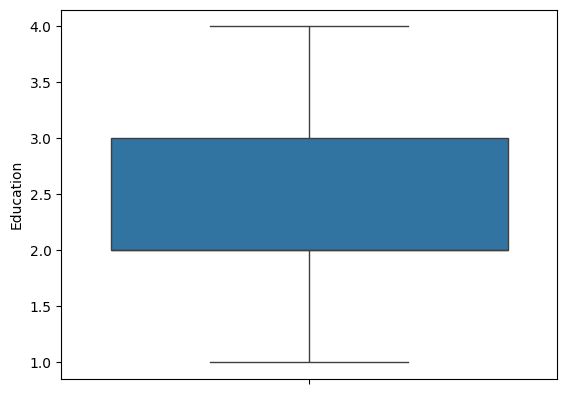

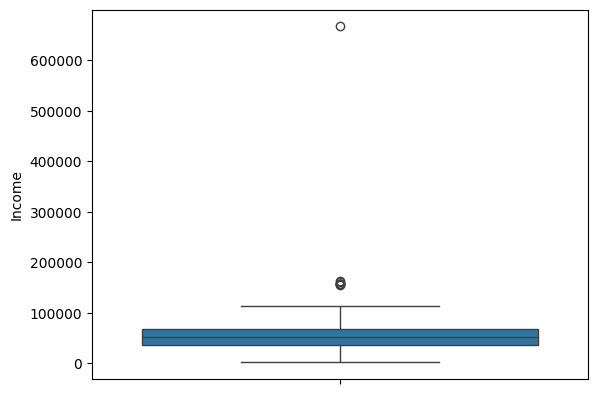

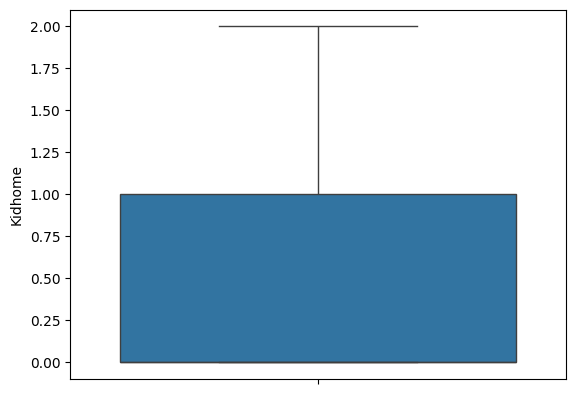

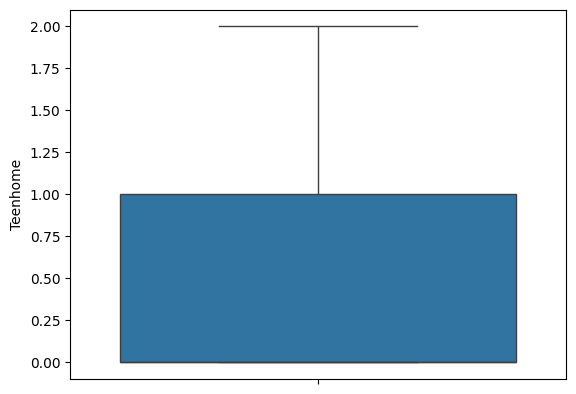

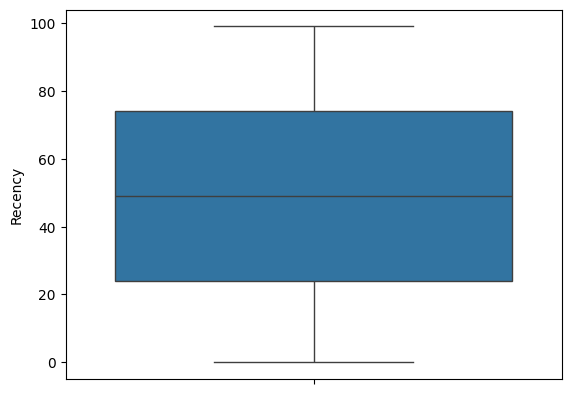

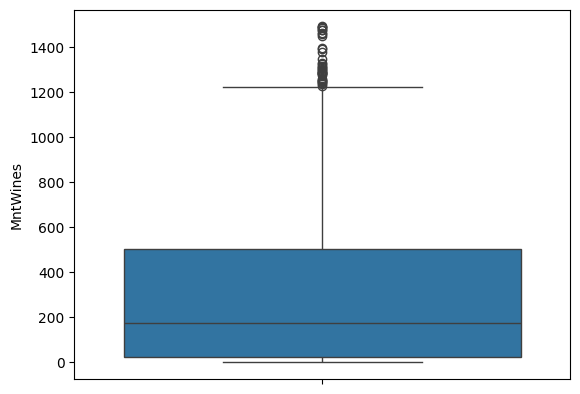

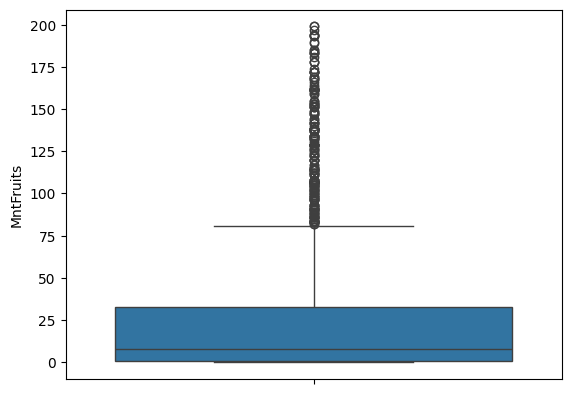

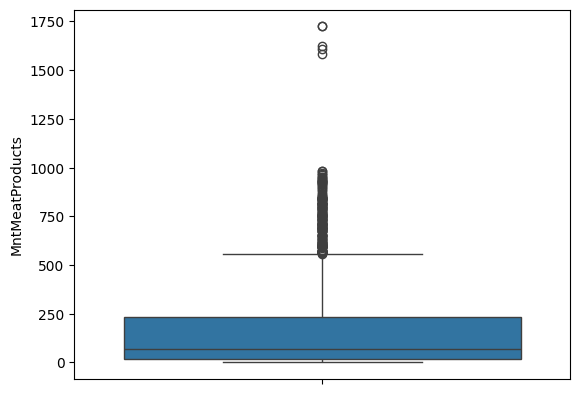

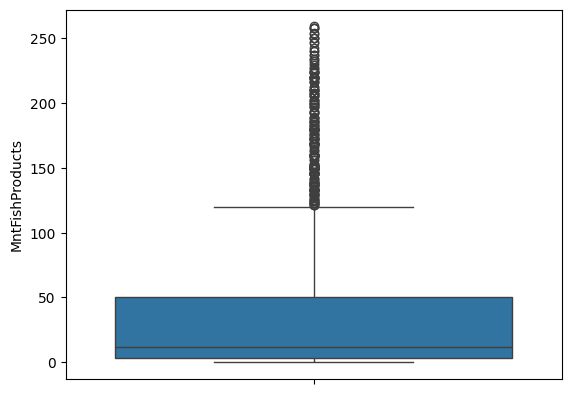

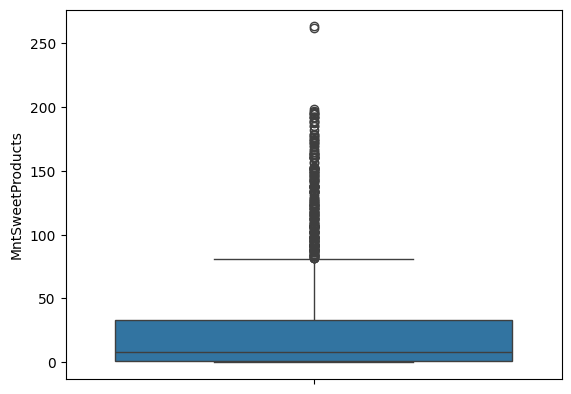

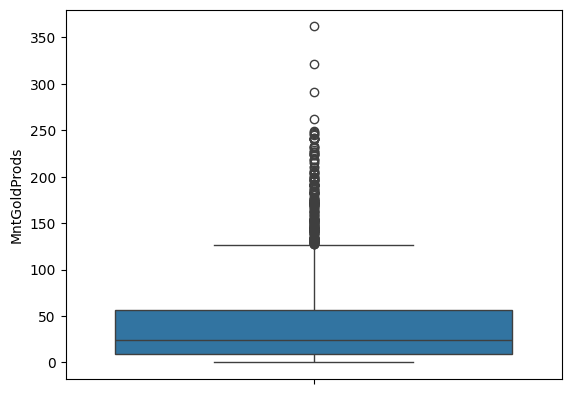

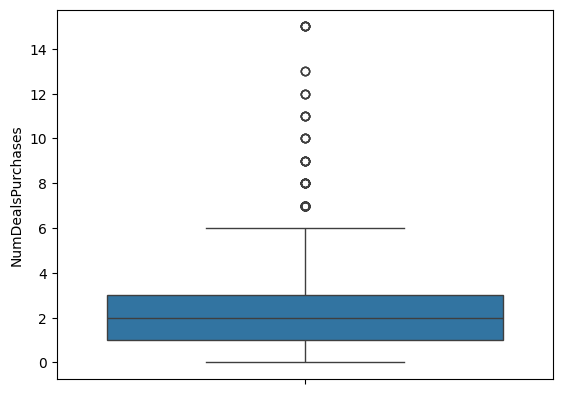

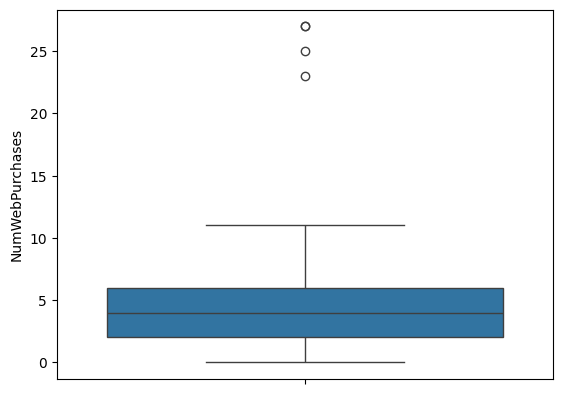

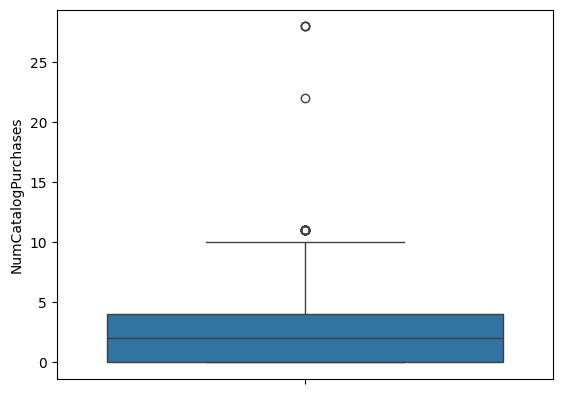

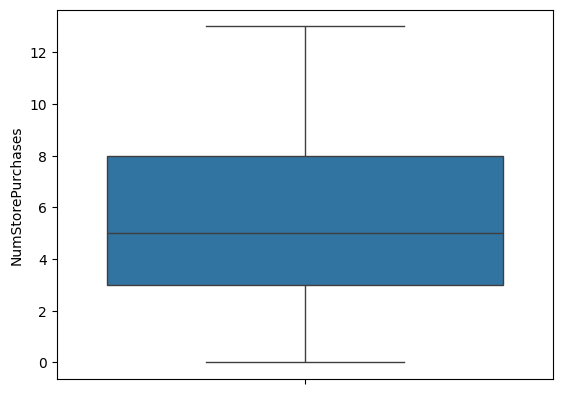

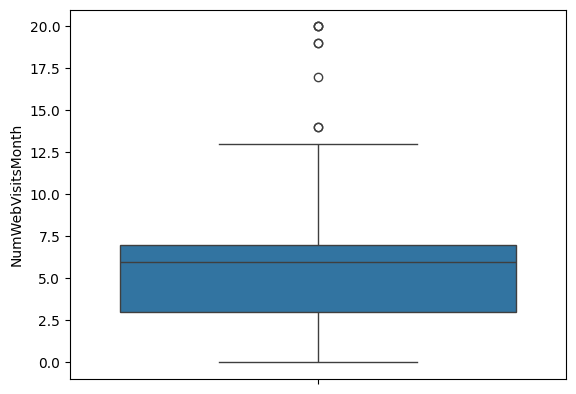

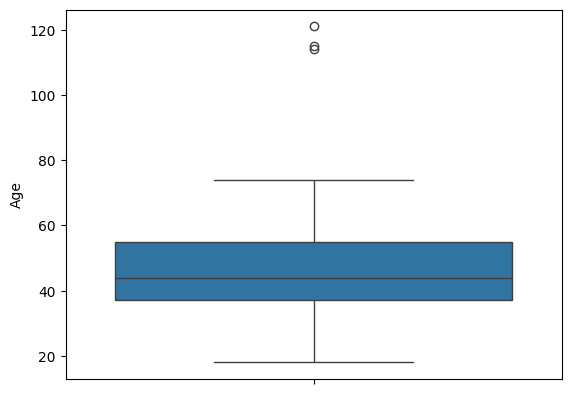

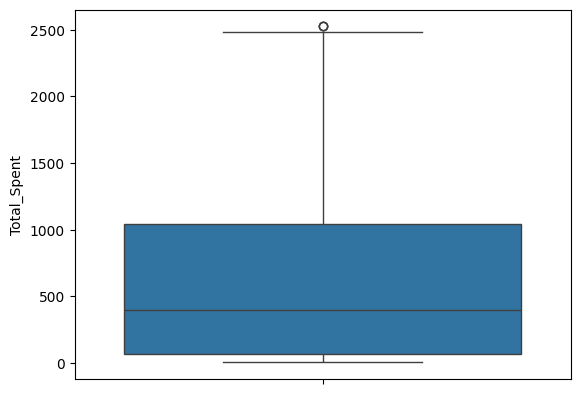

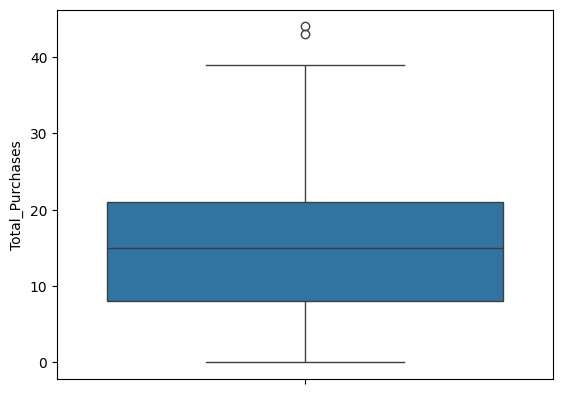

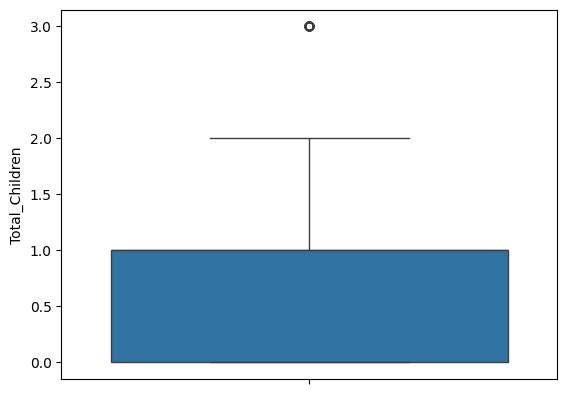

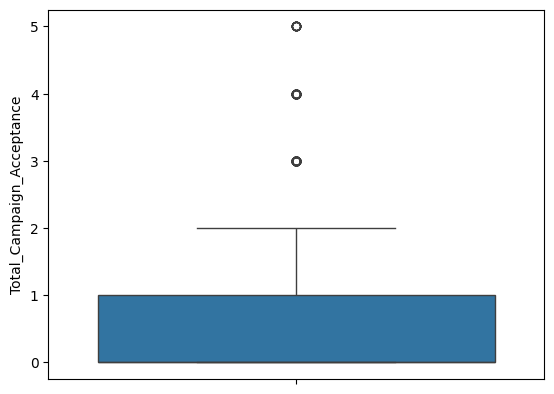

In [433]:
## We need to update the list of the numeric and object columns

l_object = []
l_numeric = []

for col in df_raw.columns:
    if df_raw[col].dtype=="object" or df_raw[col].nunique()<=2:
        l_object.append(col)
    else:
        l_numeric.append(col)

for col in l_numeric:
    sns.boxplot(df_raw[col])
    plt.show()

We have detected the outliers in the dataset in some features.
* We will count how many outliers exist in each feature and then we will handle them.

In [434]:
outliers = []

for col in l_numeric:
    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    l_outliers = df_raw[(df_raw[col] < (Q1 - 3 * IQR)) | (df_raw[col] > (Q3 + 3 * IQR))].index
    outliers.extend(l_outliers)

print(len(outliers))

401


We've detected 391 outliers in the dataset. That's a significant amount of the dataset.
* Let's check the distribution of the features with outliers and then we will handle them.

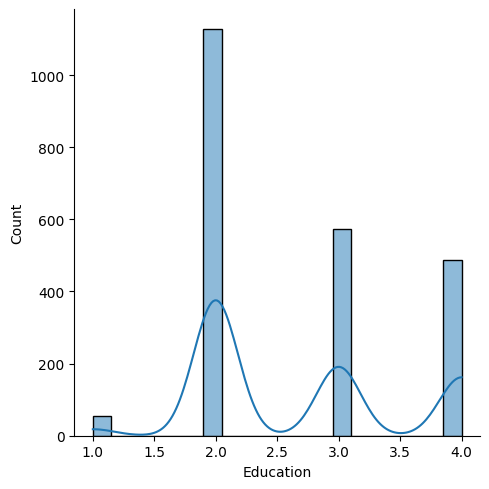

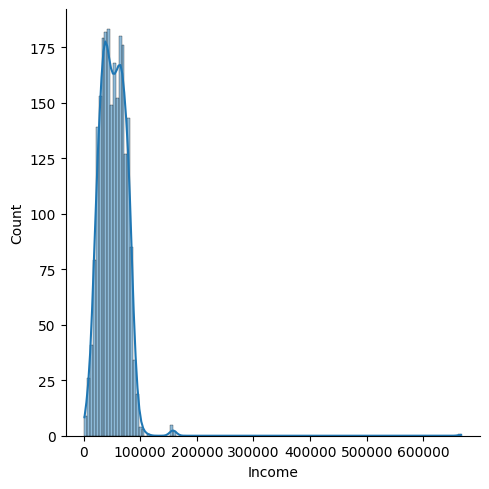

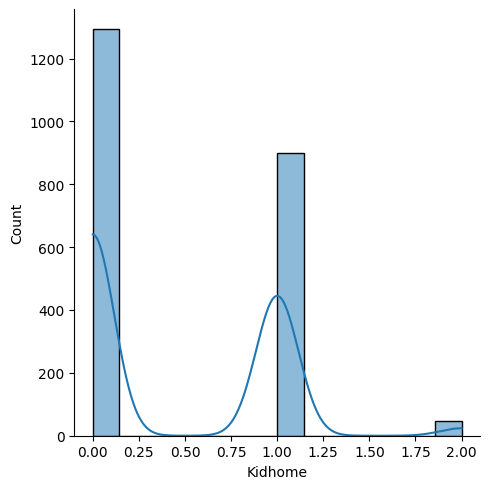

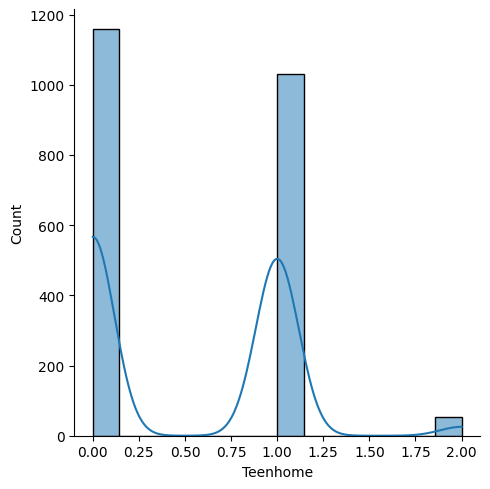

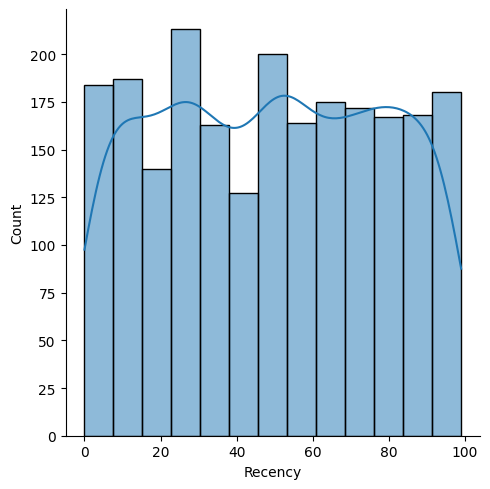

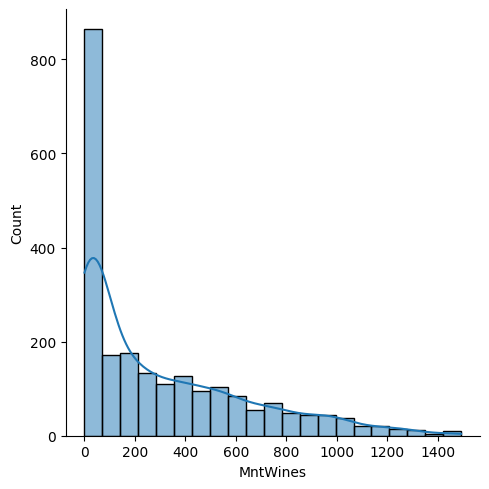

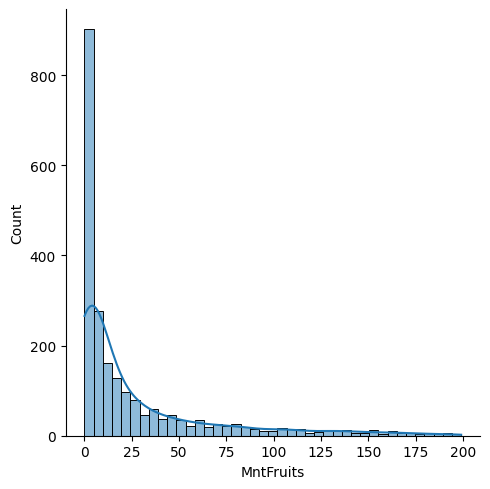

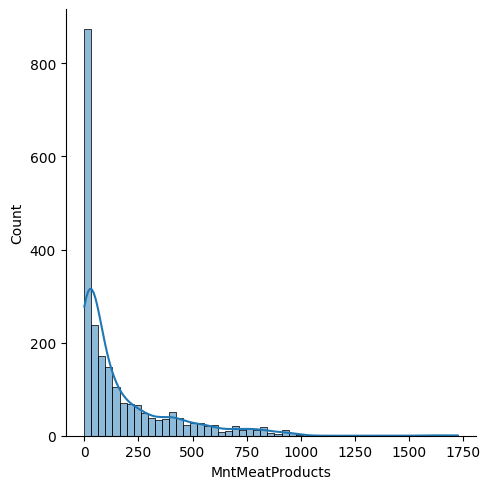

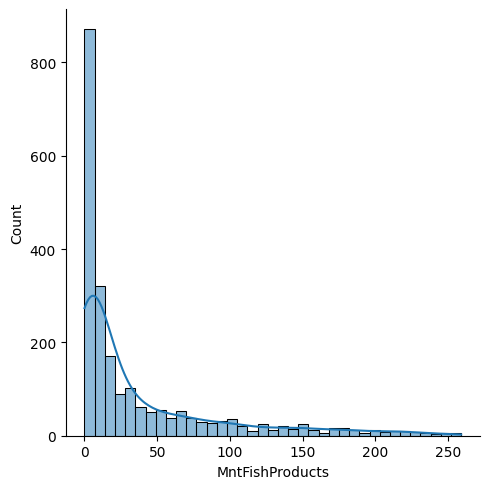

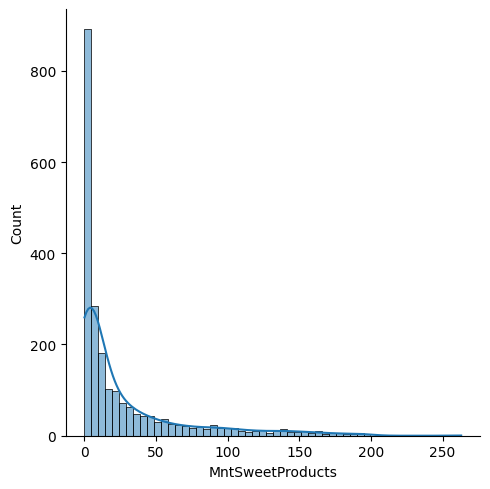

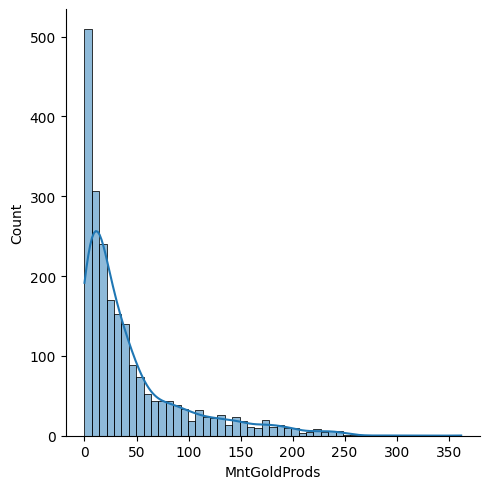

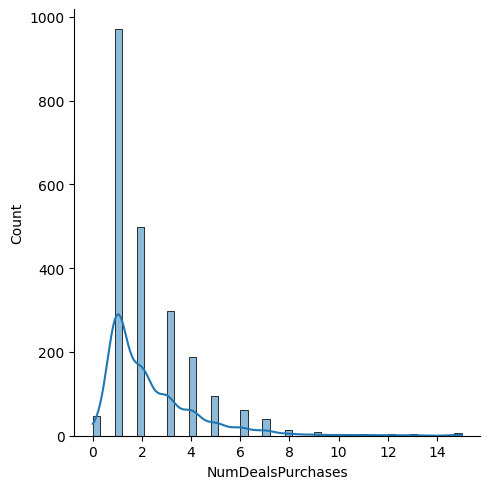

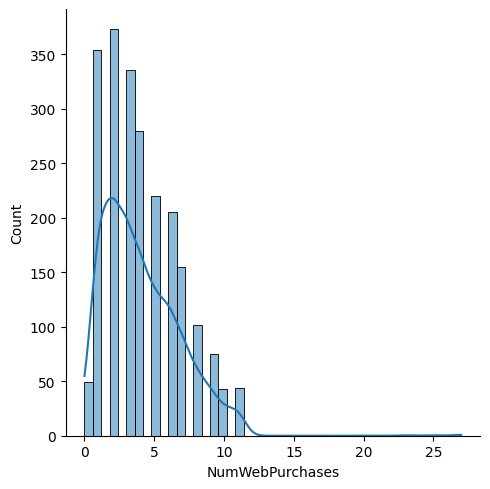

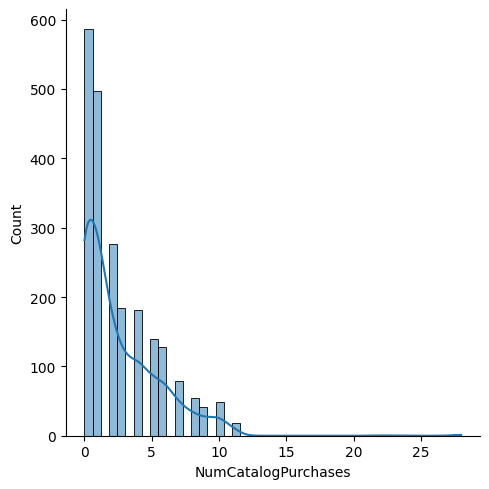

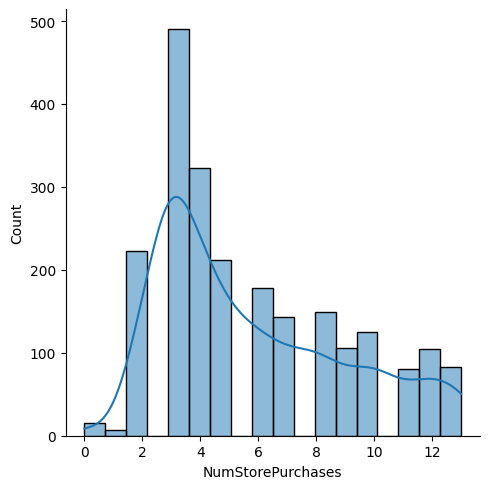

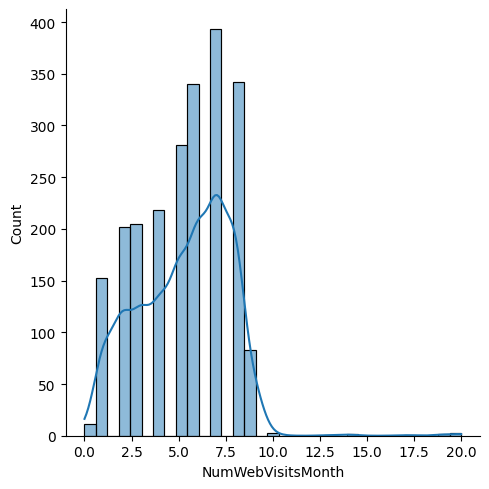

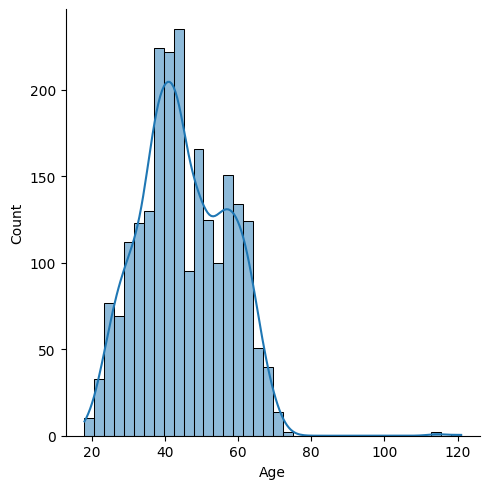

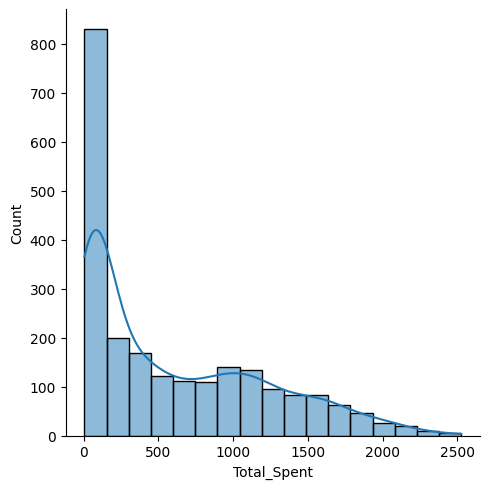

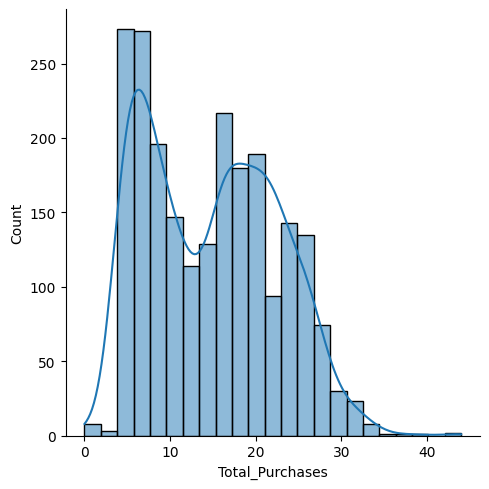

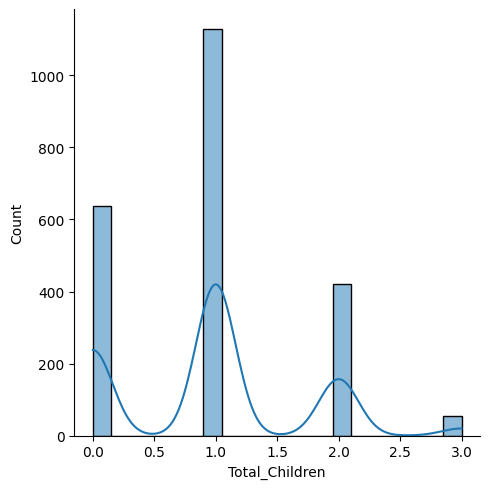

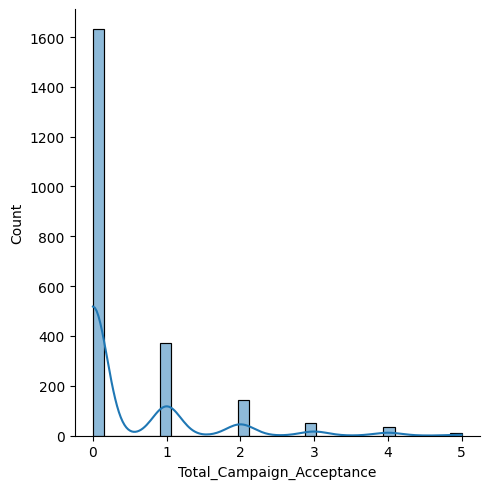

In [435]:
for col in l_numeric:
    sns.displot(df_raw[col],kde=True)
    plt.show()

* We can say that most of the features are right-skewed.
* Some features are zero-inflated and some of them uniform distributed.
* We need to handle the zero-inflated features differently than the others since it would affect our outlier detection.

### How to handle the zero inflated or right skewed(maybe both) features?
* We can use the log transformation for the zero-inflated features.
* The reason for that is the log transformation can make the features more normally distributed and it can help us to detect the outliers more accurately.
* Actually, the log transformation is a very useful tool for the right-skewed and zero-inflated features. That's why we will use the log transformation for the zero-inflated or right-skewed features.

Let's start with detecting the right skewed and zero inflated features.

In [436]:
## detect the positive skewness and trasnform it with log1p

for col in l_numeric:
    if df_raw[col].skew() >=1:
        df_raw[col] = np.log1p(df_raw[col]+1)

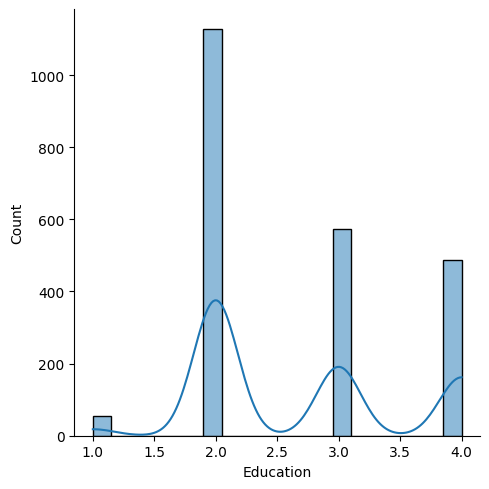

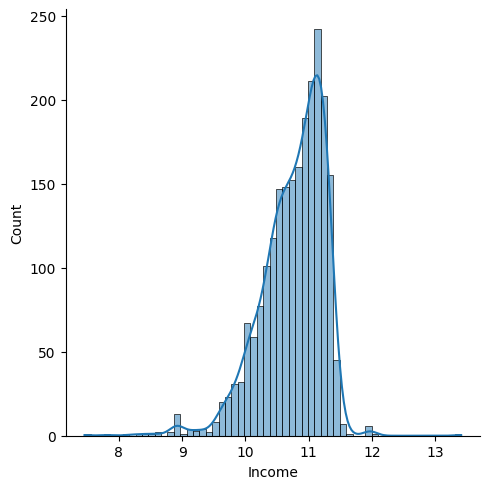

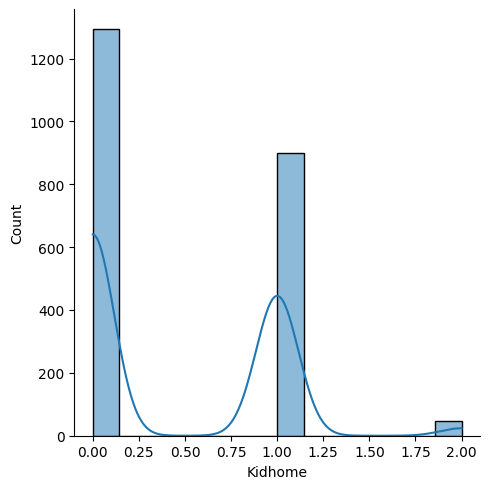

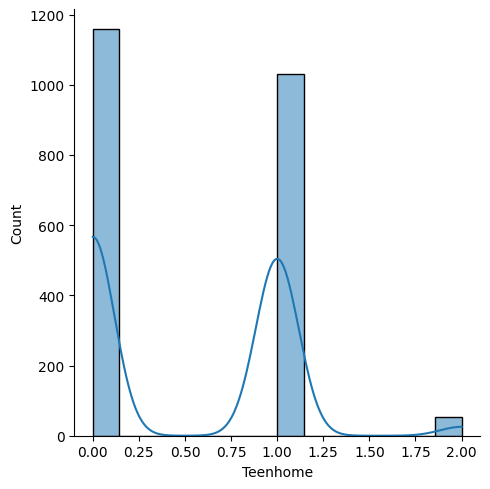

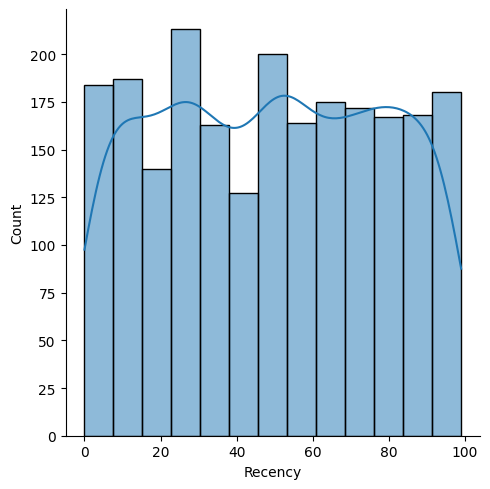

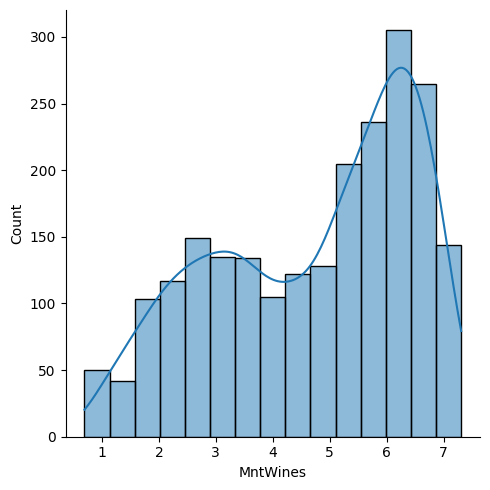

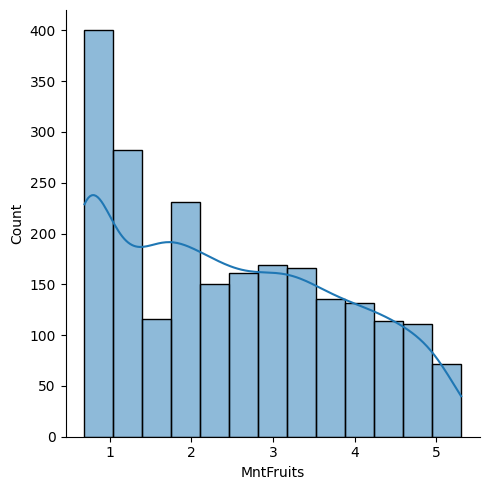

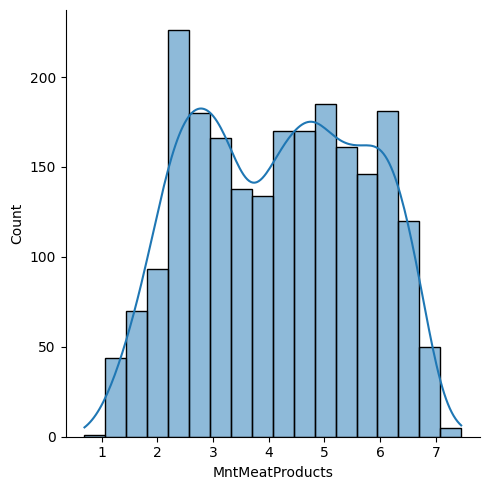

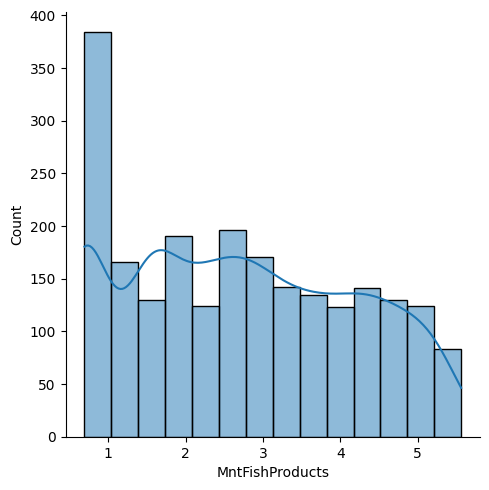

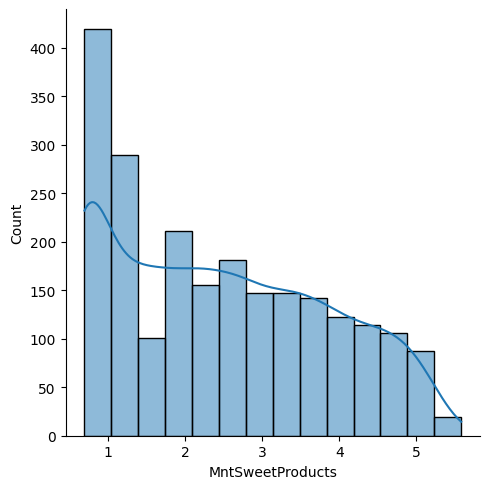

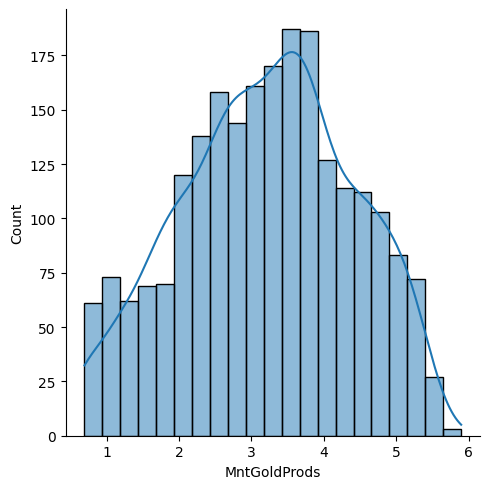

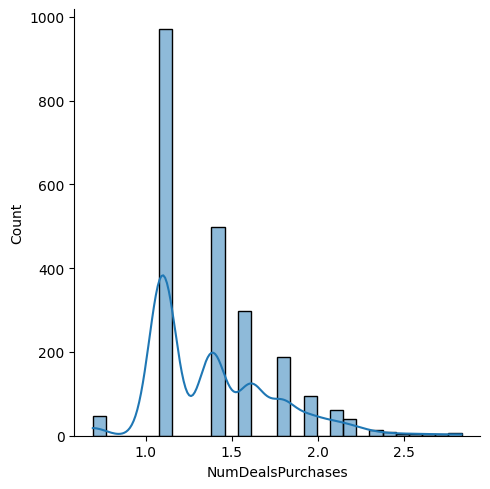

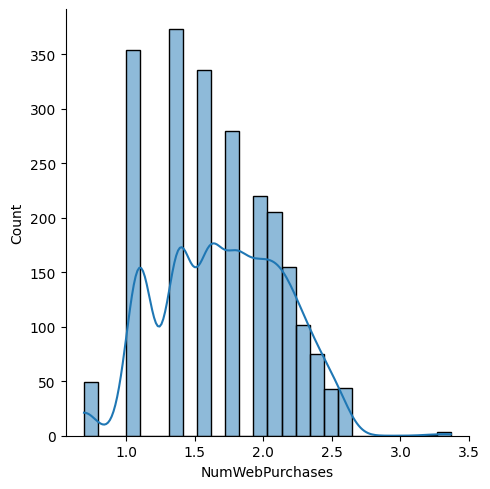

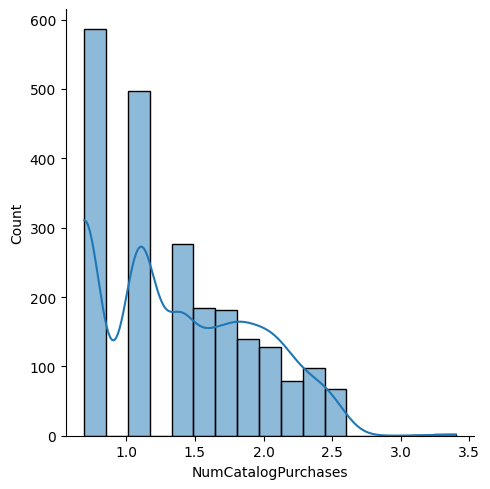

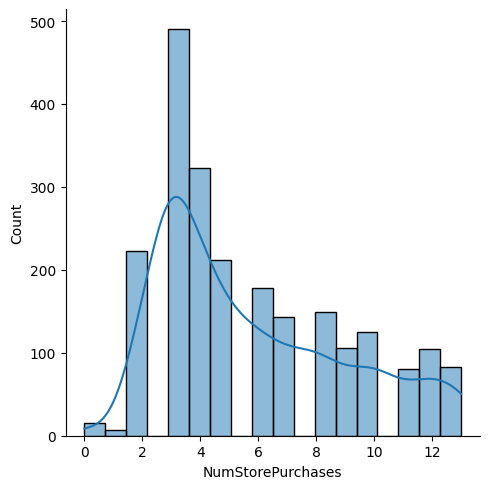

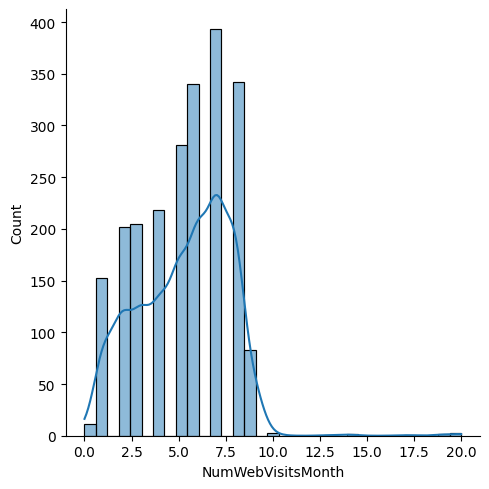

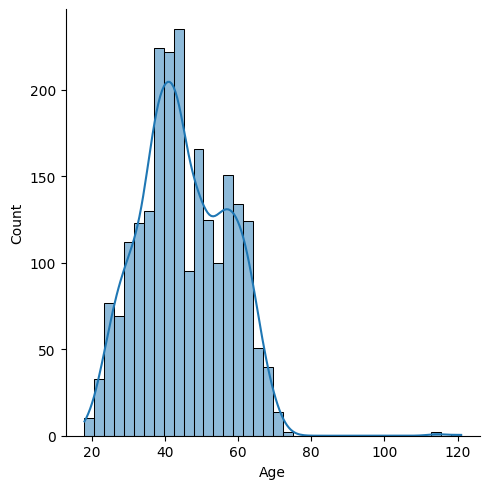

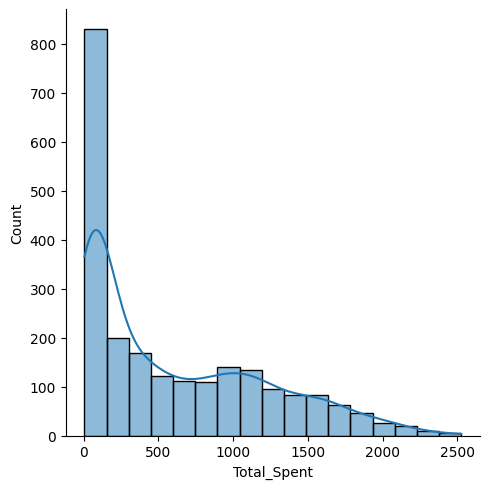

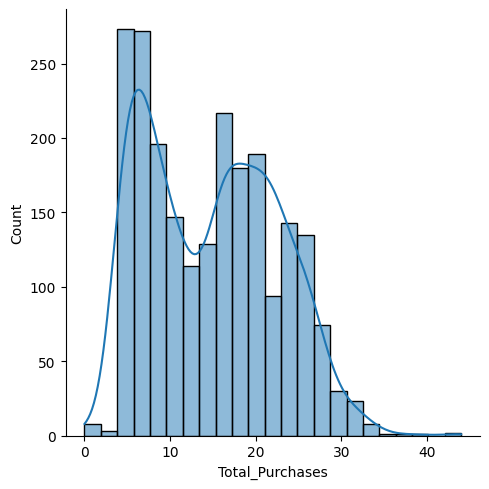

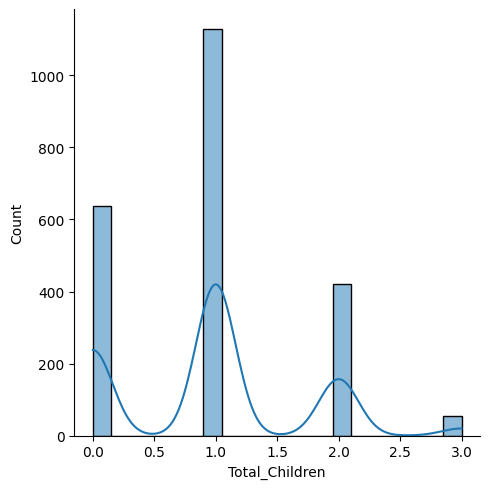

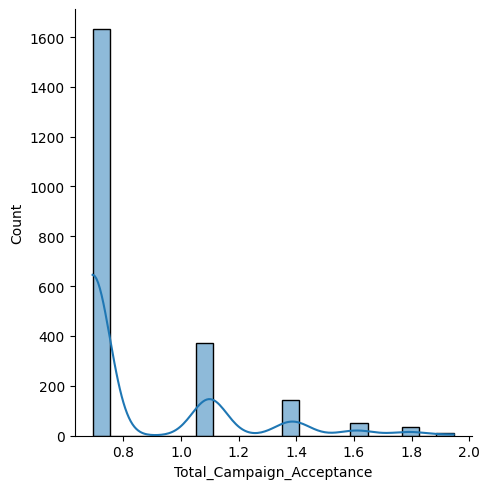

In [437]:
for col in l_numeric:
    sns.displot(df_raw[col],kde=True)
    plt.show()

* After transforming the zero-inflated features, we can see that the distributions are more normally distributed.
* Some features tend to be uniform distributed after the log transformation.
* We can move on with the outlier detection and handling part.

In [438]:
df_raw.shape

(2240, 33)

In [439]:
for col in l_numeric:
    IQR = df_raw[col].quantile(0.75) - df_raw[col].quantile(0.25)
    lower_bound = df_raw[col].quantile(0.25) - 1.5*IQR
    upper_bound = df_raw[col].quantile(0.75) + 1.5*IQR
    df_raw[col] = np.where(df_raw[col]<lower_bound,lower_bound,df_raw[col])
    df_raw[col] = np.where(df_raw[col]>upper_bound,upper_bound,df_raw[col])

print(df_raw.shape)

(2240, 33)


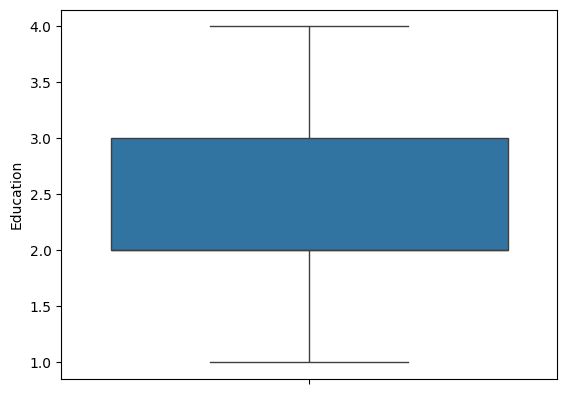

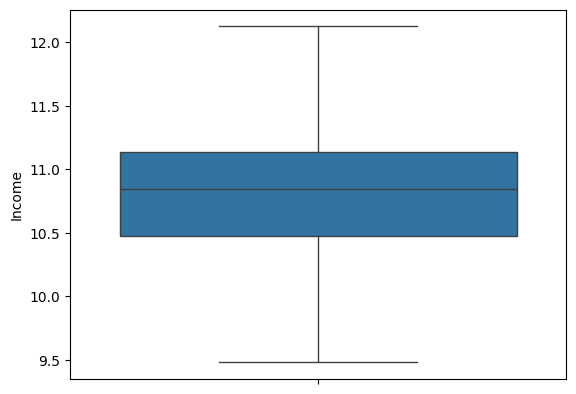

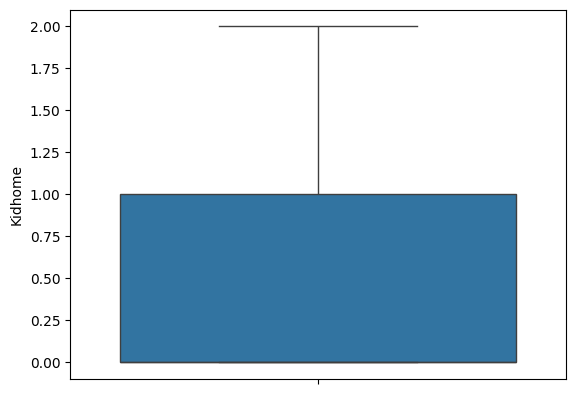

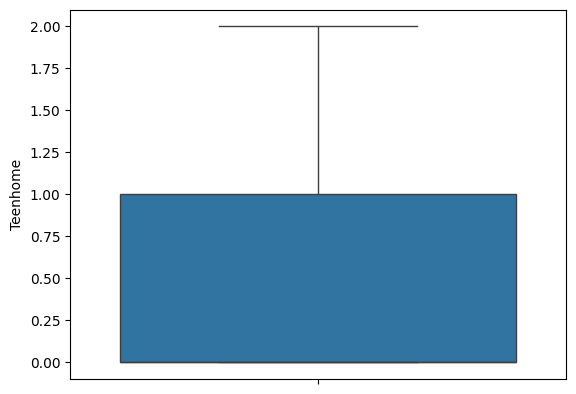

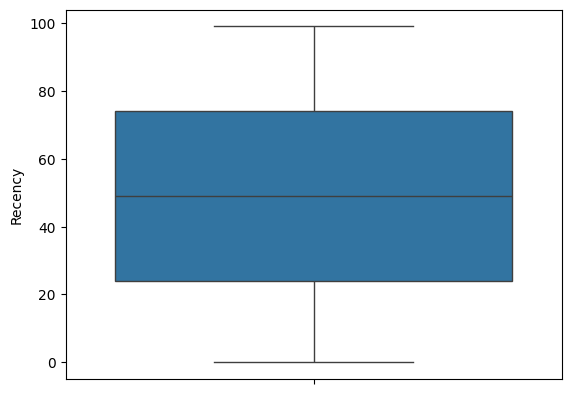

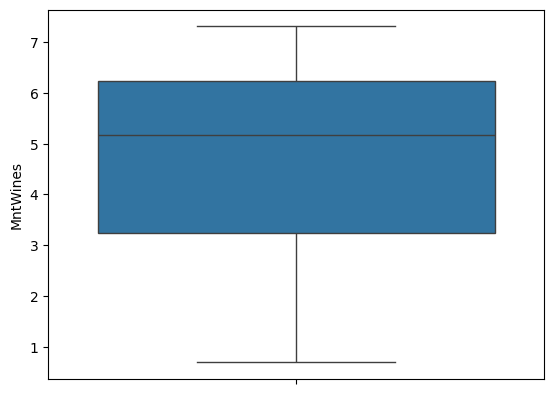

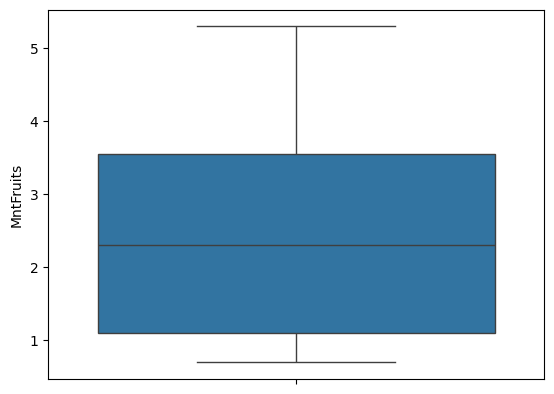

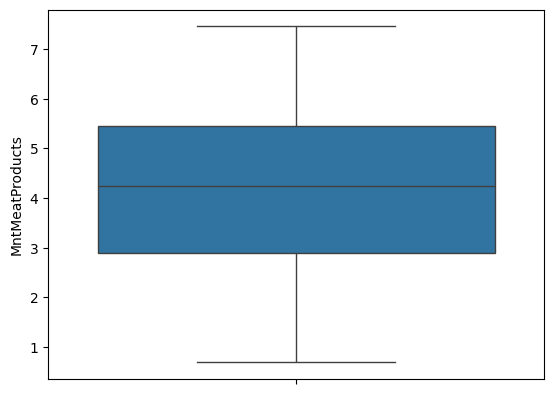

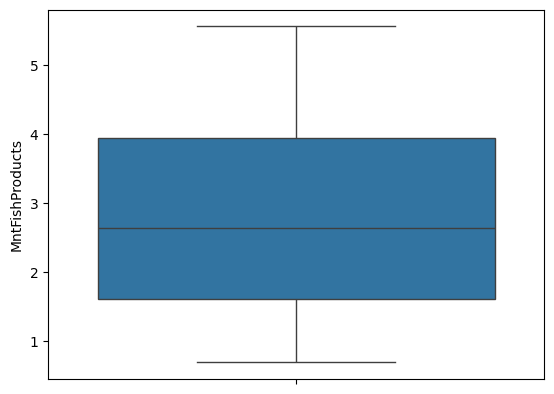

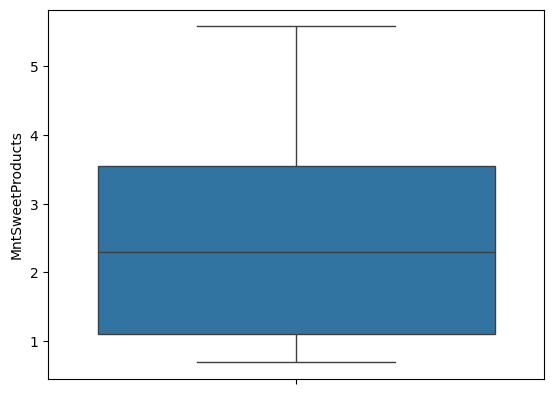

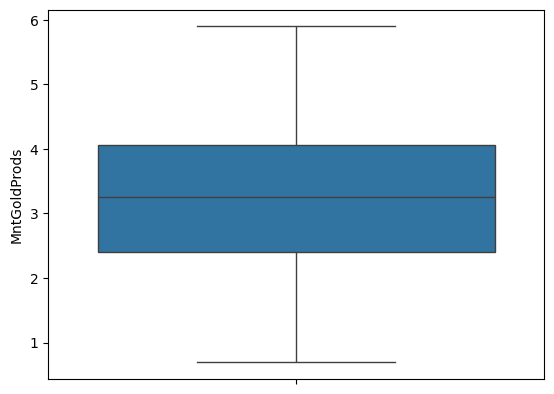

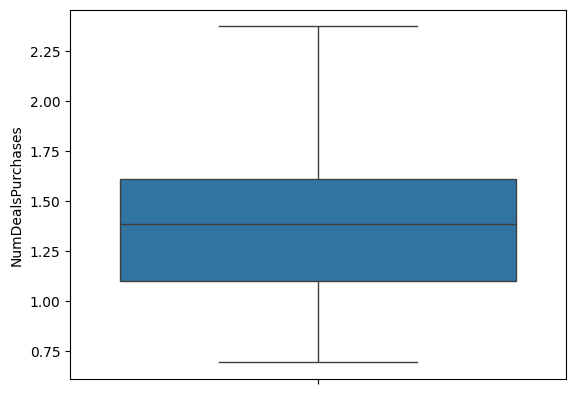

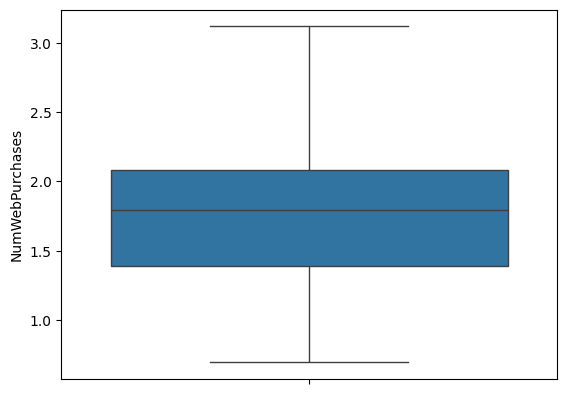

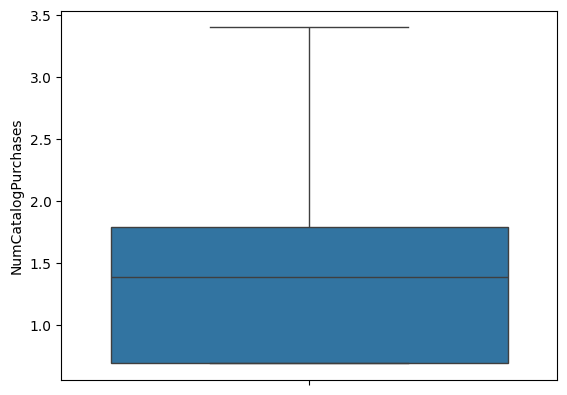

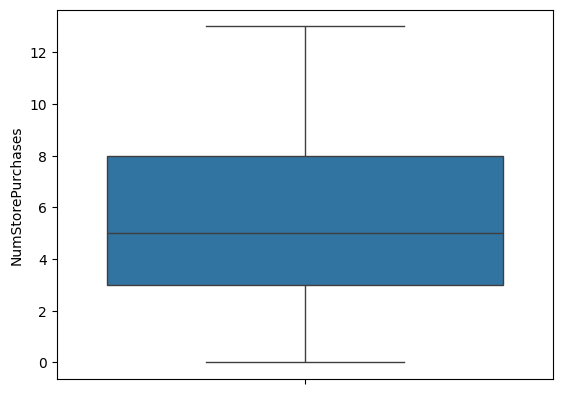

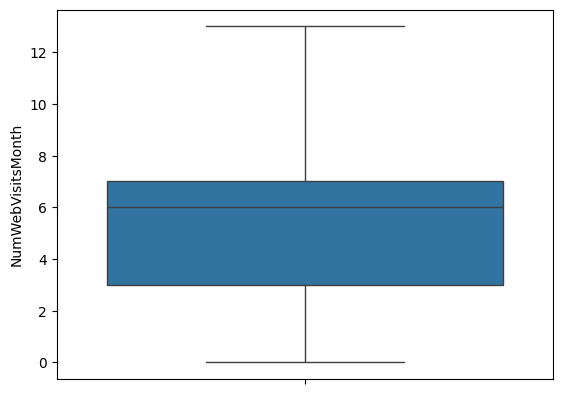

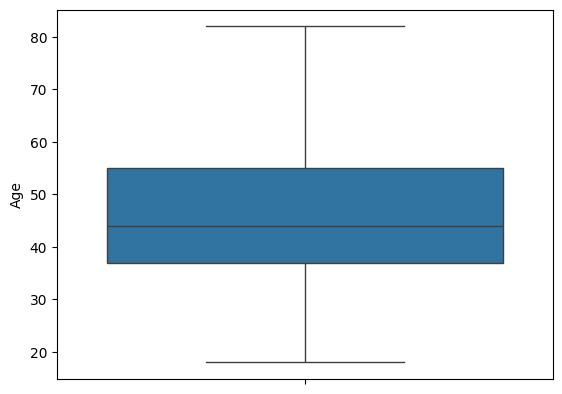

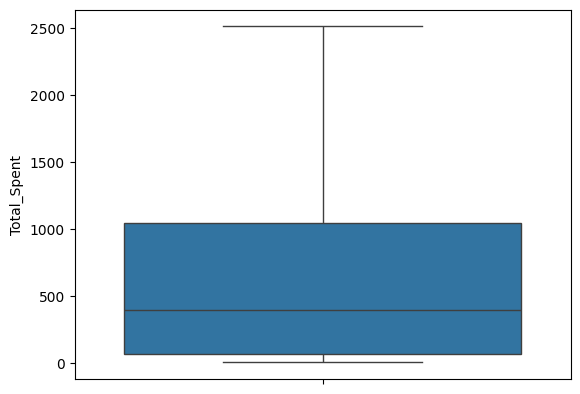

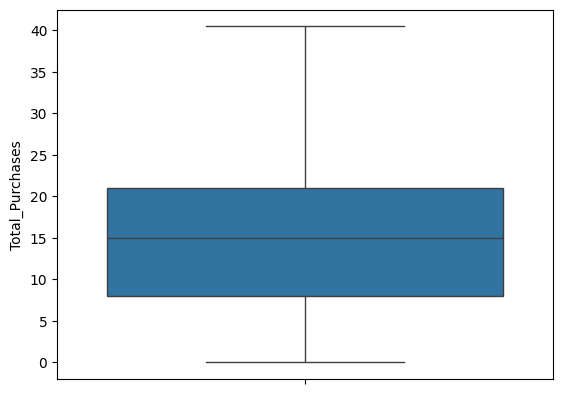

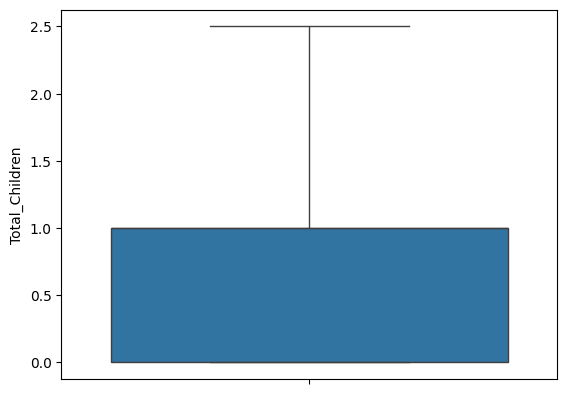

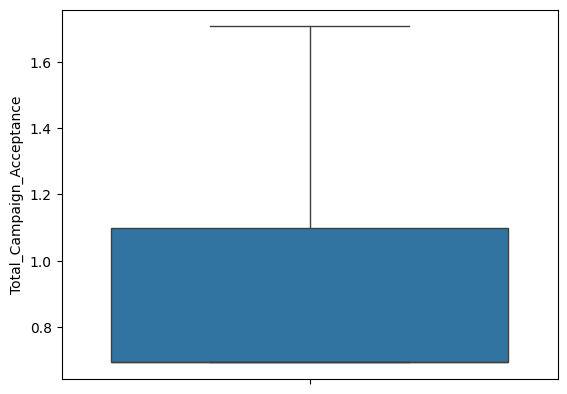

In [440]:
for col in l_numeric:
    sns.boxplot(df_raw[col])
    plt.show()

After the log transformation, we can see that there exist no outliers since we have handled them with log1p.
* We can move on with the next part of the notebook which is normalization.

## 1.5 Normalization

* In this part, we will normalize the features of the dataset.
* We will use the Robust Scaler for the normalization of the features.

### Why do we need normalization and why Robust Scaler?
* The reason for that is the features of the dataset have different scales and the outliers in the features can affect the normalization process significantly.
* The Robust Scaler is robust to the outliers and it can scale the features based on the IQR.
* Additionally, in order to apply the PCA, we need to normalize the features.


In [441]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

df_scaled = scaler.fit_transform(df_raw[l_numeric])

df_scaled = pd.DataFrame(df_scaled,columns=l_numeric)

df_raw[l_numeric] = df_scaled

In [442]:
df_scaled.head()

Education    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0        0.0  0.187188      0.0       0.0     0.18  0.432779   0.894367   
1        0.0 -0.155779      1.0       1.0    -0.22 -0.873754  -0.490070   
2        0.0  0.502520      0.0       0.0    -0.46  0.299284   0.663173   
3        0.0 -0.992962      1.0       0.0    -0.46 -0.873754  -0.207929   
4        2.0  0.191216      1.0       0.0     0.90 -0.000956   0.612226   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         0.807879         1.076092          0.894367      0.746874   
1        -0.840042        -0.534956         -0.490070     -0.708945   
2         0.243945         0.891761          0.339031      0.316438   
3        -0.445648        -0.065826         -0.282142     -0.789262   
4         0.215749         0.526151          0.433384     -0.255562   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.436829         0.736966             1.000000               -0.2   
1           0.000000        -1.000000            -0.261860               -0.6   
2          -0.563171         0.736966             0.000000                1.0   
3           0.000000        -0.584963            -0.630930               -0.2   
4           1.095512         0.222392             0.203114                0.2   

   NumWebVisitsMonth       Age  Total_Spent  Total_Purchases  Total_Children  \
0               0.25  0.722222     1.250064         0.769231            -1.0   
1              -0.25  0.888889    -0.377783        -0.692308             1.0   
2              -0.50  0.277778     0.389045         0.461538            -1.0   
3               0.00 -0.777778    -0.351165        -0.538462             0.0   
4              -0.25 -0.611111     0.026619         0.307692             0.0   

   Total_Campaign_Acceptance  
0                        1.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0

Let's check our distribution of the features after the normalization.

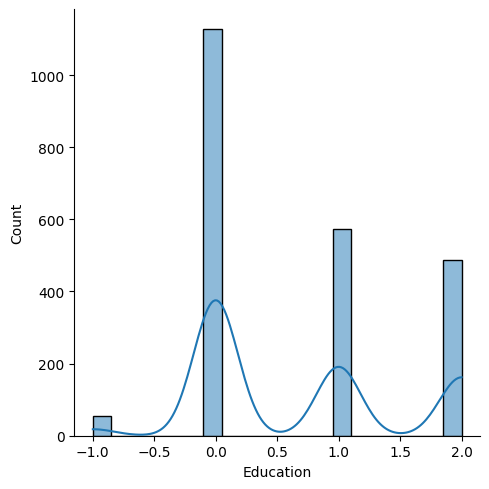

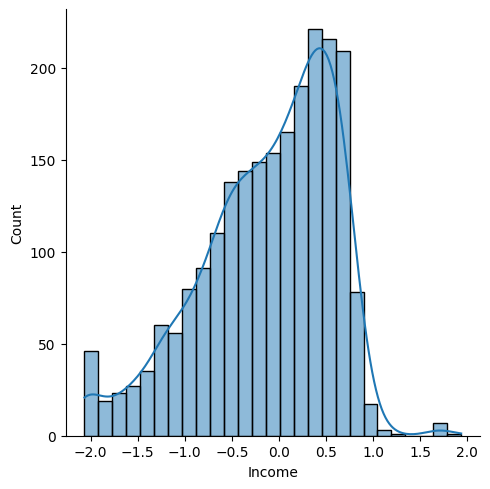

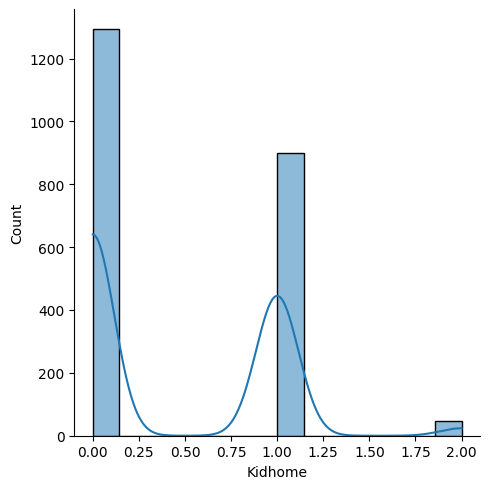

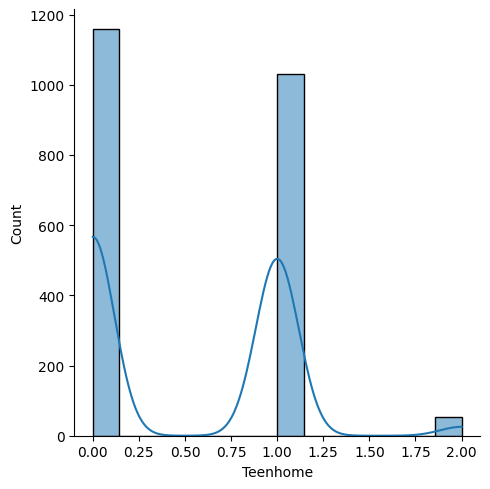

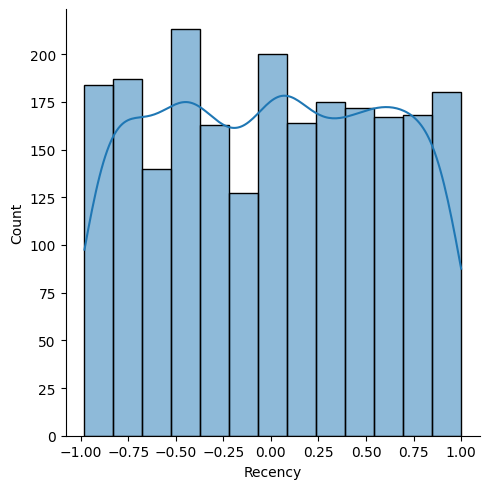

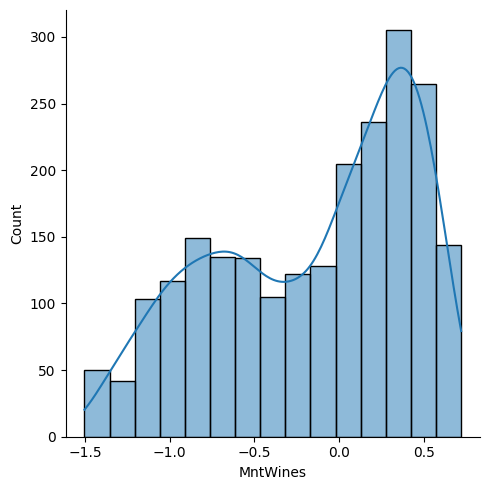

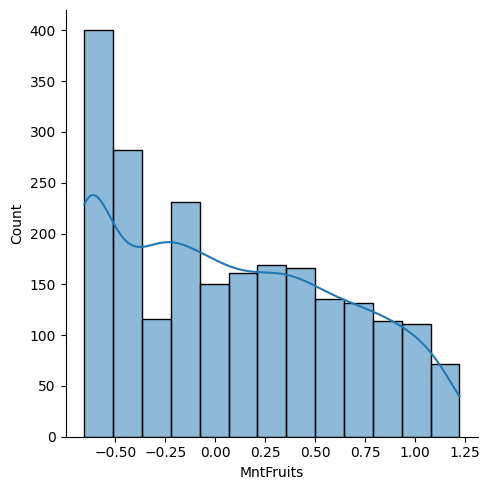

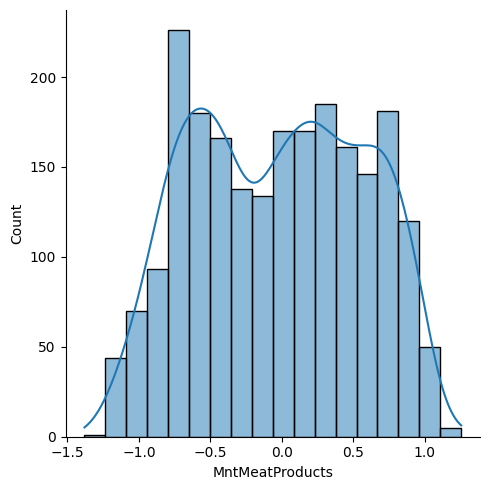

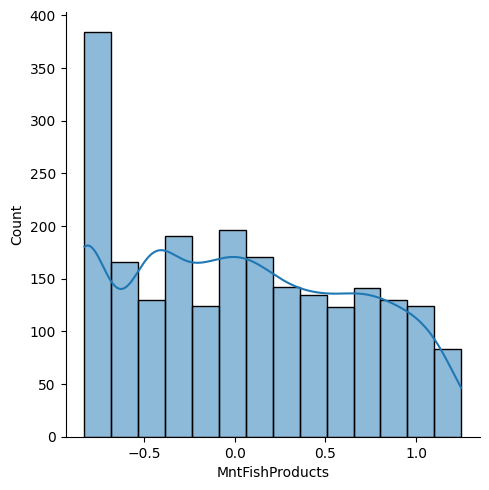

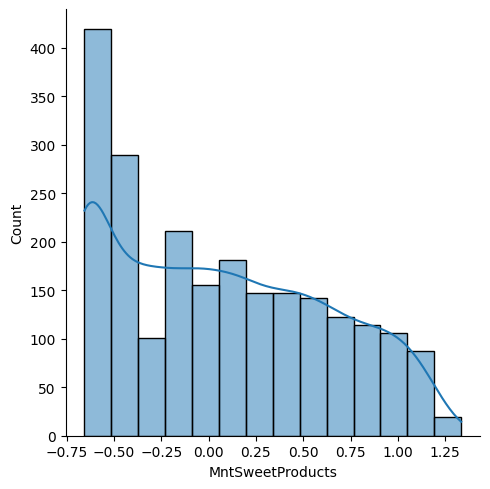

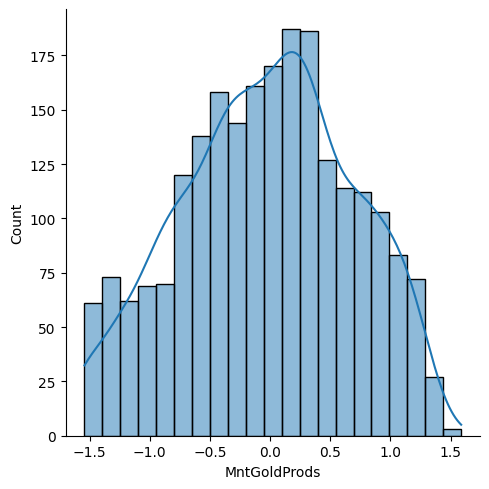

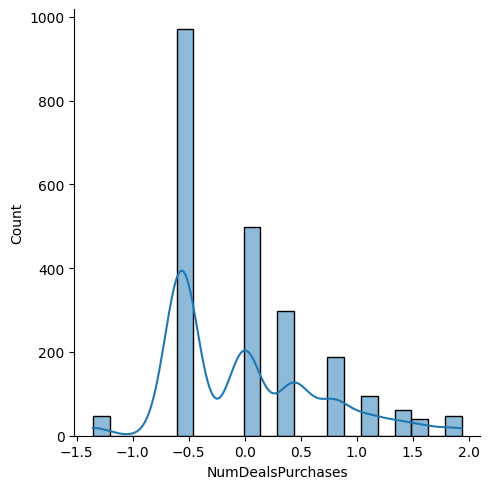

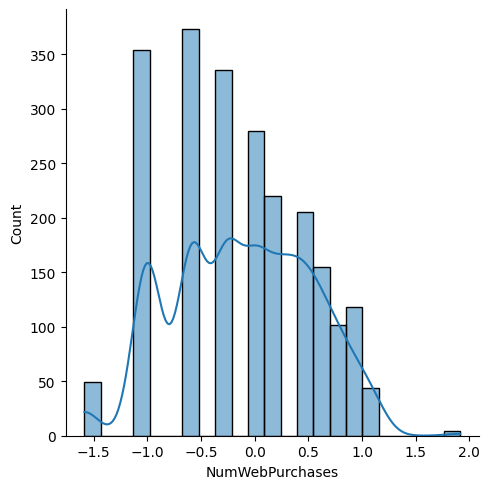

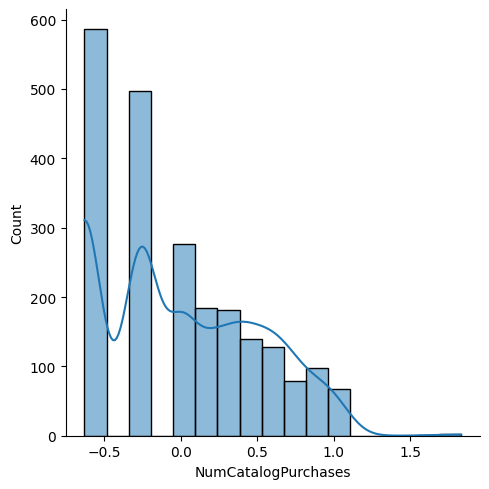

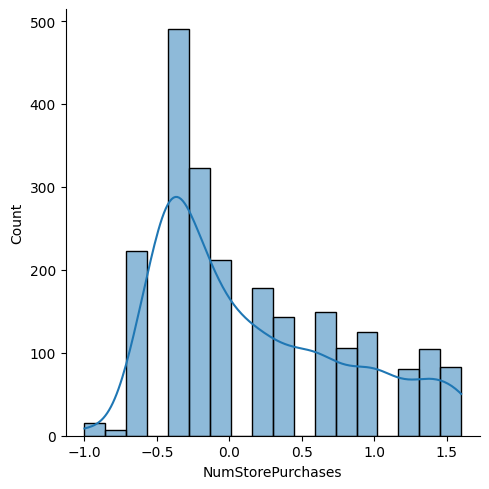

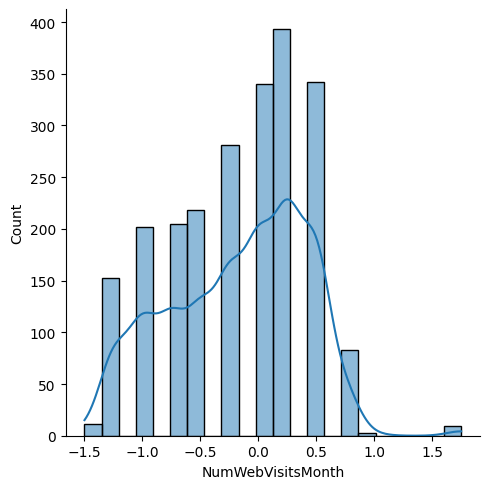

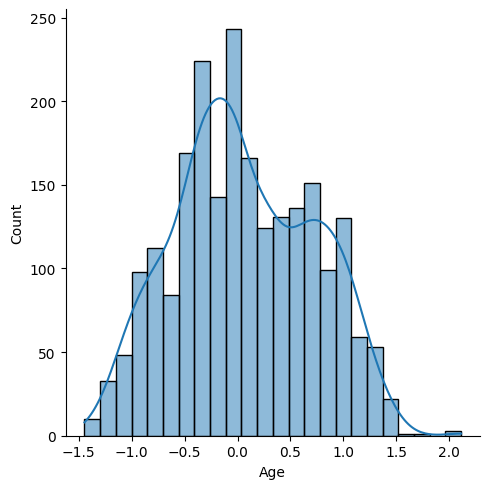

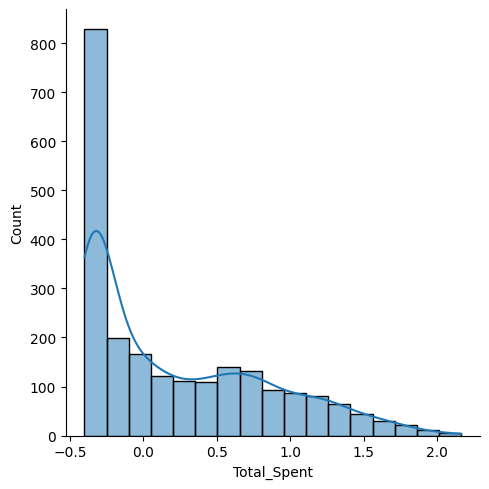

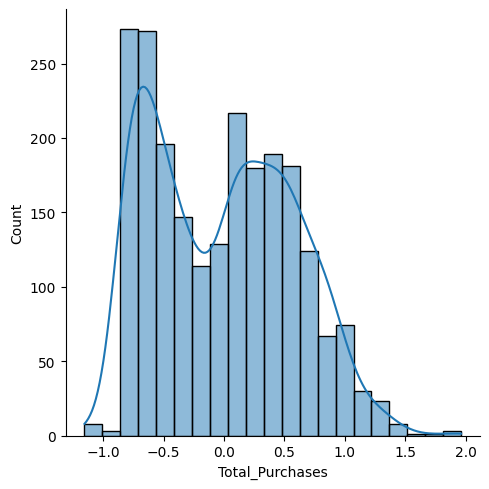

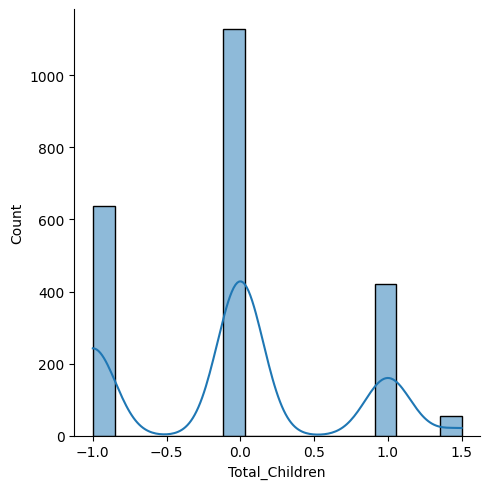

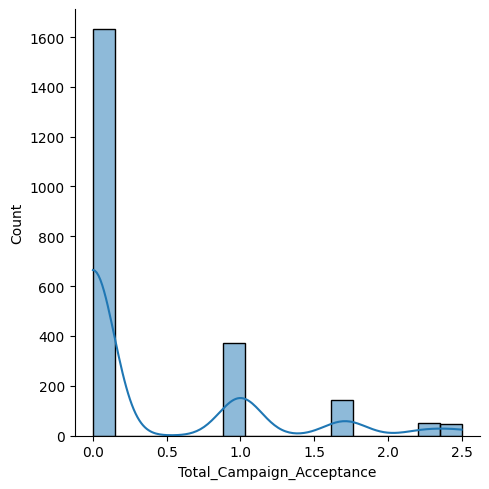

In [443]:

for col in l_numeric:
    sns.displot(df_raw[col],kde=True)
    plt.show()

* Now we have completed the data preprocessing part.
* We can move on to the next part of the notebook which is the Exploratory Data Analysis.

## 2. Exploratory Data Analysis

* In this part, we will analyze the features of the dataset and we will try to understand the relationships between the features.
* We will also visualize the clusters in 2D and 3D space after the clustering analysis.

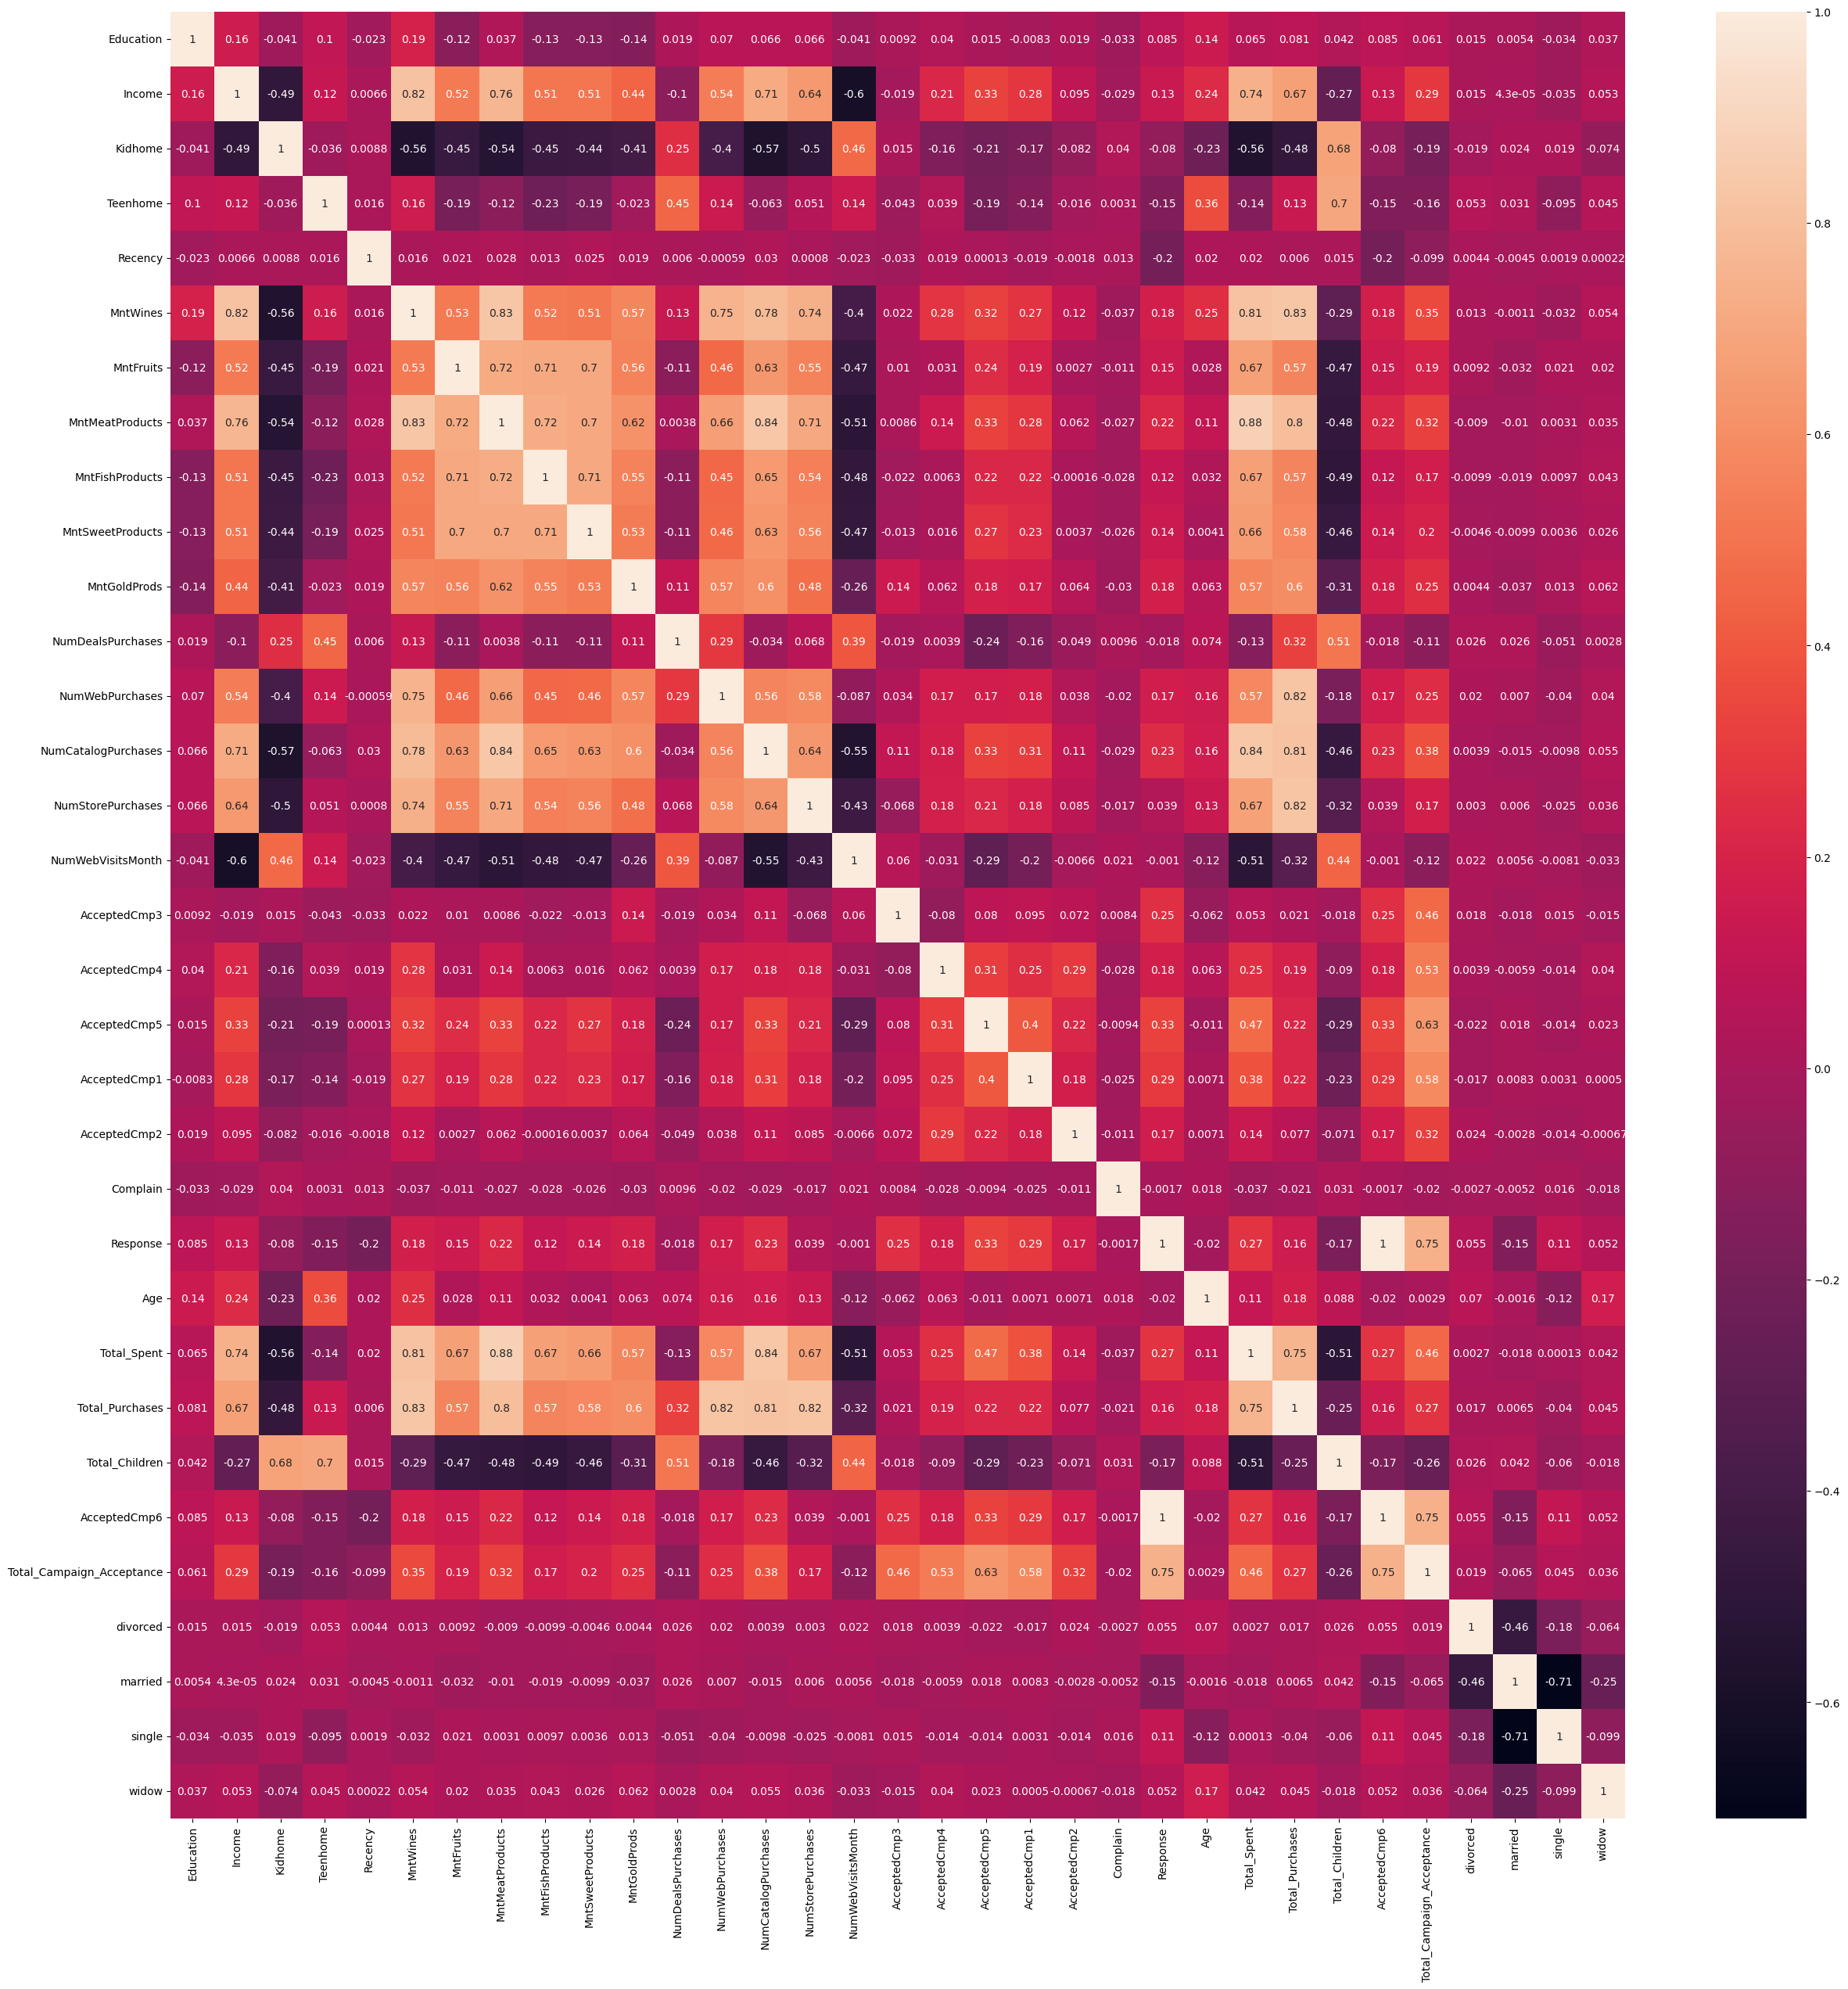

In [444]:
plt.figure(figsize=(30,30))
sns.heatmap(df_raw.corr(),annot=True)
plt.show()

* By checking the correlation matrix, we can see that there is correlation between the features.
* Features which have correlation usually are a feature and its' total version. For instance 'MntWines' and 'Total_Spending' have a correlation of 0.81 which is high.
* There are some other useful correlations like 'Income' and 'Total_Spent' which is 0.68.

## 3. Clustering Analysis with PCA

* In this part, we will apply the clustering analysis on the dataset.
* We will use the PCA for the dimensionality reduction and then we will apply the clustering algorithms on the dataset.
* We will use the KMeans, DBSCAN, Agglomerative Clustering and Gaussian Mixture Model for the clustering analysis.

In [445]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

df_pca = pca.fit_transform(df_raw)

df_pca = pd.DataFrame(df_pca,columns=['pca1','pca2','pca3'])

df_pca.head()


pca1      pca2      pca3
0  2.625822 -0.331766 -0.698773
1 -2.244116  0.277584 -0.177353
2  1.812721 -0.687517 -0.621556
3 -1.906599 -0.868372 -0.624831
4  0.440897  0.758399  0.298119

In [446]:
pca.explained_variance_ratio_.sum()

0.5750107254310015

* You can see that the explained variance ratio of the PCA components is **0.58** which is neither bad or fabolous.

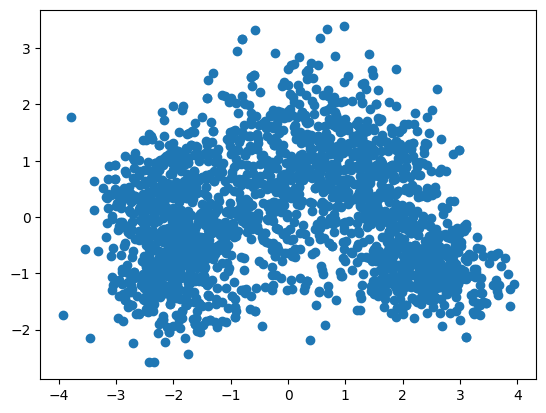

In [447]:
plt.scatter(df_pca['pca1'],df_pca['pca2'])
plt.show()

### Clustering Analysis with KMeans

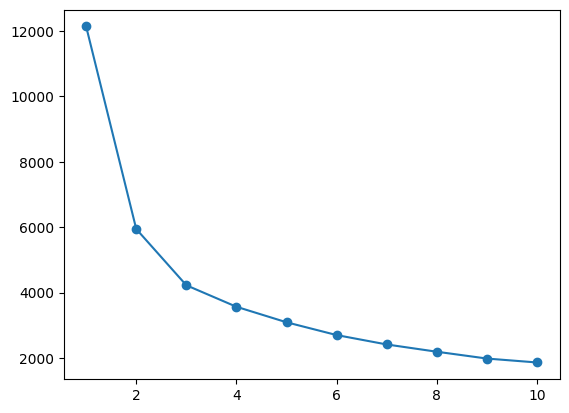

In [448]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10,max_iter=300)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11),inertia,marker='o')
plt.show()

* By using the Elbow Method, we can see that the optimal number of clusters is 3.
* We will use 3 clusters for the KMeans algorithm.

In [449]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42,n_init=10,max_iter=300)

kmeans.fit(df_pca)

df_pca['cluster_pca'] = kmeans.labels_


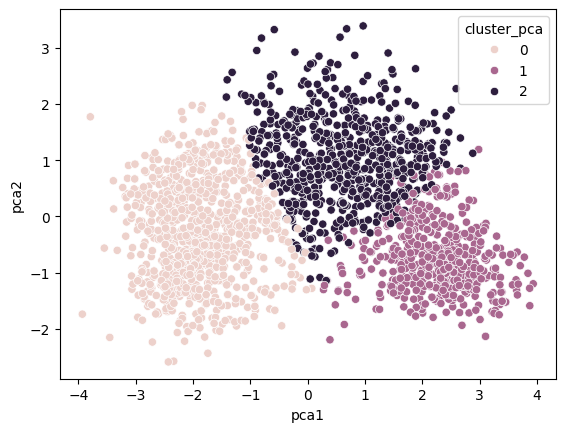

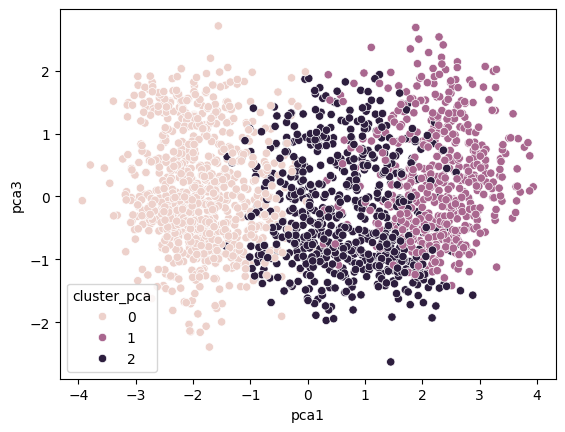

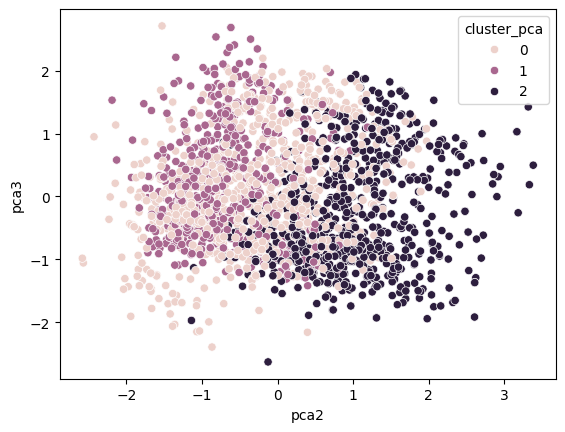

In [450]:
sns.scatterplot(x='pca1',y='pca2',data=df_pca,hue='cluster_pca')
plt.show()

sns.scatterplot(x='pca1',y='pca3',data=df_pca,hue='cluster_pca')
plt.show()

sns.scatterplot(x='pca2',y='pca3',data=df_pca,hue='cluster_pca')
plt.show()


In [451]:
import plotly.express as px

fig = px.scatter_3d(df_pca, x='pca1', y='pca2', z='pca3',
                color='cluster_pca',symbol='cluster_pca',opacity=0.7, size_max=18)
fig.show()

* As you can see from the 2D and 3D visualizations of the clusters, we can see that the clusters are not well-separated.
* Maybe it's because of PCA or the nature of the dataset.
* Let's try the Agglomerative Clustering algorithm for the clustering analysis.

### Clustering Analysis with Agglomerative Clustering

In [452]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)

df_agg = agg.fit_predict(df_pca)

df_pca['cluster_agg'] = df_agg

fig = px.scatter_3d(df_pca, x='pca1', y='pca2', z='pca3',
                color='cluster_agg',symbol='cluster_agg',opacity=0.5, size_max=18)
fig.show()

### Clustering Analysis with Gaussian Mixture Model

In [453]:
## gaussian mixture model

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)

df_gmm = gmm.fit_predict(df_pca)

df_pca['cluster_gmm'] = df_gmm

fig = px.scatter_3d(df_pca, x='pca1', y='pca2', z='pca3',
                color='cluster_gmm',symbol='cluster_gmm',opacity=0.5, size_max=18)
fig.show()

## Why we couldn't get well-separated clusters?

* The reason for that is we mixed everyfeature up and we couldn't get the well-separated clusters.
* We will try with different approaches in the next section.
* Let's first drop the pca and cluster columns from our dataset.

## Let's 'Cluster' the features and then visualize the clusters.

* So we will first group our features based on their nature.

* We will group the features based on their nature.
    * Demographic Features
        * Education
        * Income
        * Kidhome
        * Teenhome
        * Recency
        * divorced
        * married
        * single
        * widow
        * Age
        * Total_Children

    * Spending Features
        * MntWines
        * MntFruits
        * MntMeatProducts
        * MntFishProducts
        * MntSweetProducts
        * MntGoldProds
        * Total_Spent
        
    * Campaign Features
        * AcceptedCmp1
        * AcceptedCmp2
        * AcceptedCmp3
        * AcceptedCmp4
        * AcceptedCmp5
        * AcceptedCmp6
        * Response
        * Complain
        * Total_Campaign_Acceptance

    * Purchase Features
        * Total_Purchases
        * NumDealsPurchases
        * NumWebPurchases
        * NumCatalogPurchases
        * NumStorePurchases
        * NumWebVisitsMonth

* We will obtain 3 pairs of clusters from the dataset.
    * Demographic Features - Spending Features
    * Demographic Features - Campaign Features
    * Demoographic Features - Purchase Features

In [454]:
df_demographic = df_raw[['Education','Income','Age','Total_Children','Kidhome','Teenhome','Recency','married','divorced','single','widow']].copy()
df_spending = df_raw[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Total_Spent']].copy()
df_campaign = df_raw[['Total_Campaign_Acceptance','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6','Response','Complain']].copy()
df_purchase = df_raw[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Total_Purchases','NumWebVisitsMonth']].copy()

In [455]:
df_demo_spend = pd.concat([df_demographic,df_spending],axis=1)
df_demo_camp = pd.concat([df_demographic,df_campaign],axis=1)
df_demo_purch = pd.concat([df_demographic,df_purchase],axis=1)

### Apply the PCA for the clustering analysis
* This is the function for automation of the clustering analysis.

In [456]:
def getPCA(df,n=2):
    pca = PCA(n_components=n)
    df_pca = pca.fit_transform(df)
    df_pca = pd.DataFrame(df_pca,columns=['pca1','pca2'])
    print(pca.explained_variance_ratio_.sum())
    return df_pca

In [457]:
df_demo_spend_pca = getPCA(df_demo_spend)
df_demo_camp_pca = getPCA(df_demo_camp)
df_demo_purch_pca = getPCA(df_demo_purch)

0.5329639627896621
0.40917396974520254
0.48521986871054595


In [458]:
df_demo_spend = pd.concat([df_demo_spend,df_demo_spend_pca],axis=1)
df_demo_camp = pd.concat([df_demo_camp,df_demo_camp_pca],axis=1)
df_demo_purch = pd.concat([df_demo_purch,df_demo_purch_pca],axis=1)

## 4. KMeans Clustering Analysis on the Feature Clusters

In [459]:
def getKMeans(df,n=3):
    kmeans = KMeans(n_clusters=n,init='k-means++',random_state=42,n_init=10,max_iter=300)
    kmeans.fit(df)
    df['cluster'] = kmeans.labels_
    return df

In [460]:
def getElbow(df,title):
    errors = []

    for i in range(2,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42,n_init=10,max_iter=300)
        kmeans.fit(df)
        errors.append(kmeans.inertia_)

    plt.plot(range(2,11),errors,marker='o')
    plt.title(title)
    plt.show()

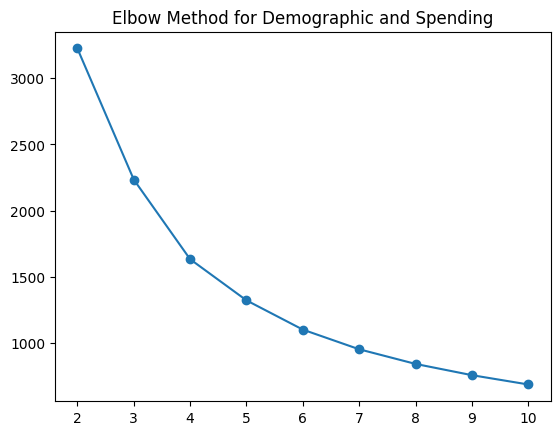

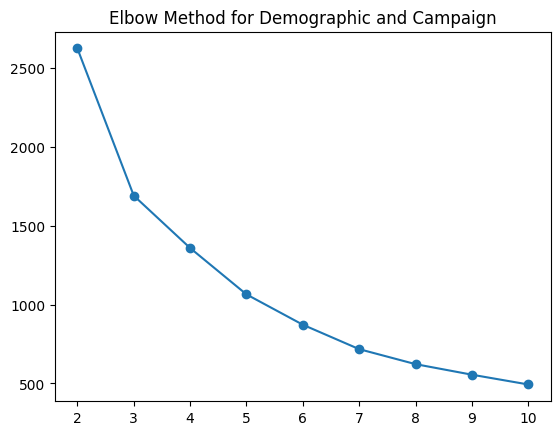

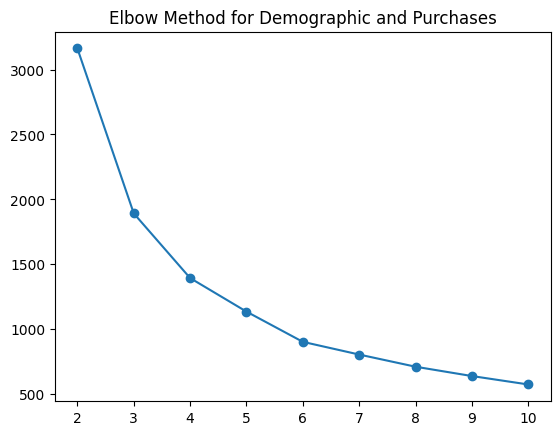

In [461]:
getElbow(df_demo_spend_pca,'Elbow Method for Demographic and Spending')
getElbow(df_demo_camp_pca,'Elbow Method for Demographic and Campaign')
getElbow(df_demo_purch_pca,'Elbow Method for Demographic and Purchases')

* When we check the elbows of the clusters, we can see that the optimal number of clusters is 3 for Purchase Features, 3 for Campaign Features and 4 for Spending Features.

* Let's visualize the clusters in 2D space.

In [462]:
num_clusters_purch = 3
num_clusters_camp = 3
num_clusters_spend = 4

In [463]:
def getPlots(df):
    fig = sns.scatterplot(x='pca1',y='pca2',data=df,hue='cluster',palette='viridis')
    plt.show()

In [464]:
df_demo_spend = getKMeans(df_demo_spend,num_clusters_spend)
df_demo_camp = getKMeans(df_demo_camp,num_clusters_camp)
df_demo_purch = getKMeans(df_demo_purch,num_clusters_purch)

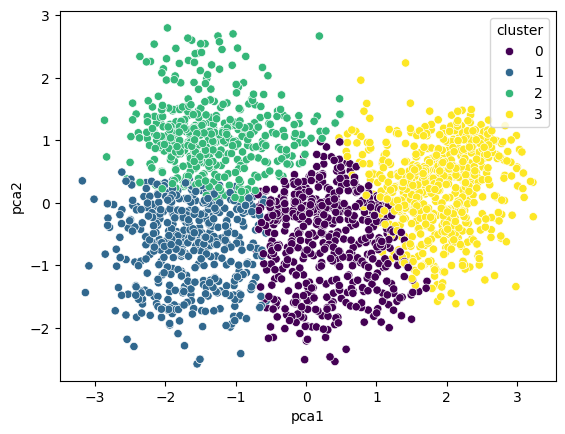

In [465]:
getPlots(df_demo_spend)
kmeans_demo_spend = silhouette_score(df_demo_spend[['pca1','pca2']],df_demo_spend['cluster'])

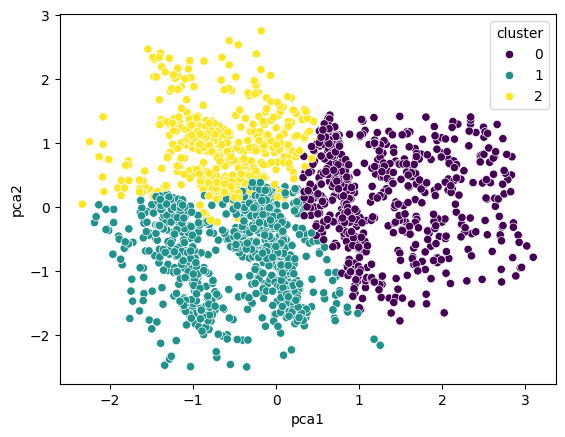

In [466]:
getPlots(df_demo_camp)
kmeans_demo_camp = silhouette_score(df_demo_camp[['pca1','pca2']],df_demo_camp['cluster'])

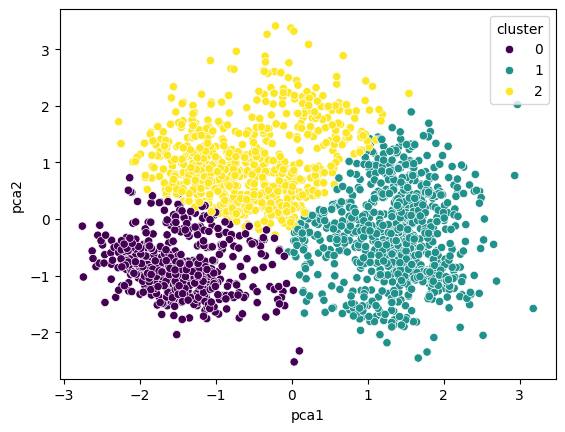

In [467]:
getPlots(df_demo_purch)
kmeans_demo_purch = silhouette_score(df_demo_purch[['pca1','pca2']],df_demo_purch['cluster'])

* We can see that the clusters are seperated better than the previous ones.
* Let's try other clustering algorithms for the clustering analysis.

### Agglomerative Clustering Analysis on the Feature Clusters

In [468]:
def getAgglomerative(df,n=3):
    agg = AgglomerativeClustering(n_clusters=n)
    df['cluster'] = agg.fit_predict(df)
    return df

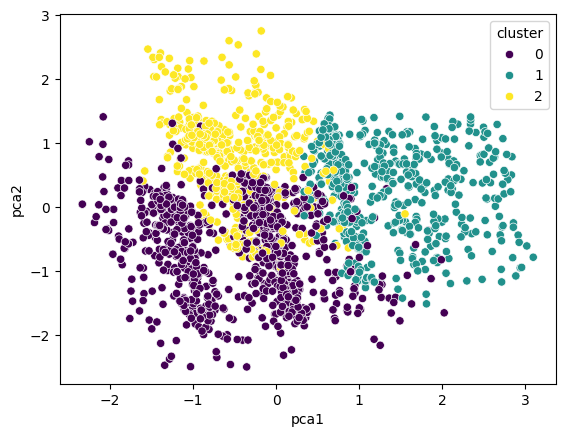

In [469]:
df_demo_camp = getAgglomerative(df_demo_camp,num_clusters_camp)
agglo_demo_camp = silhouette_score(df_demo_camp[['pca1','pca2']],df_demo_camp['cluster'])
getPlots(df_demo_camp)

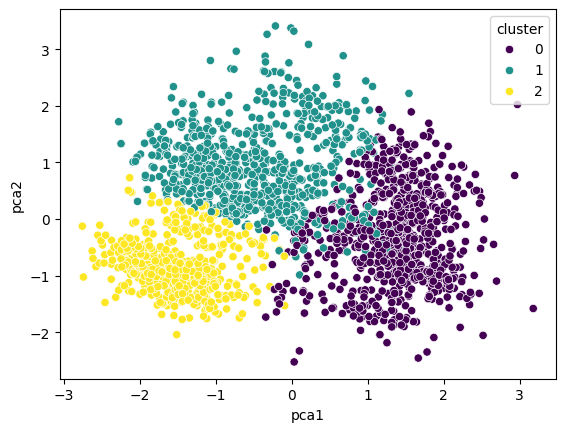

In [470]:
df_demo_purch = getAgglomerative(df_demo_purch,num_clusters_purch)
agglo_demo_purch = silhouette_score(df_demo_purch[['pca1','pca2']],df_demo_purch['cluster'])
getPlots(df_demo_purch)

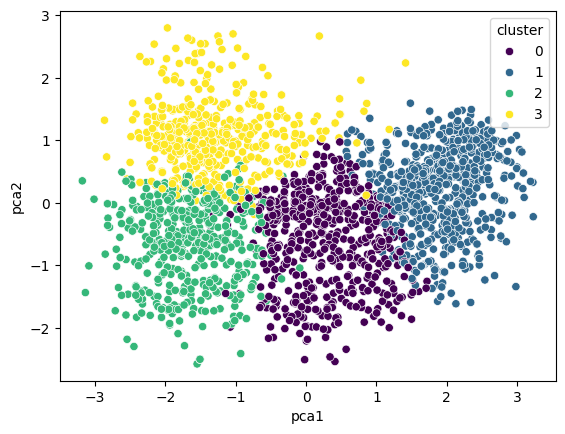

In [471]:
df_demo_spend = getAgglomerative(df_demo_spend,num_clusters_spend)
agglo_demo_spend = silhouette_score(df_demo_spend[['pca1','pca2']],df_demo_spend['cluster'])
getPlots(df_demo_spend)

* We've seen that the purchase features and campaign features are seperated differently than KMeans.
* Other than that, other df's are seperated similarly.
* Let's try the Gaussian Mixture Model for the clustering analysis.

### Gaussian Mixture Model Clustering Analysis on the Feature Clusters

In [472]:
def getGaussianMixture(df,n=3):
    gmm = GaussianMixture(n_components=n)
    df['cluster'] = gmm.fit_predict(df)
    return df

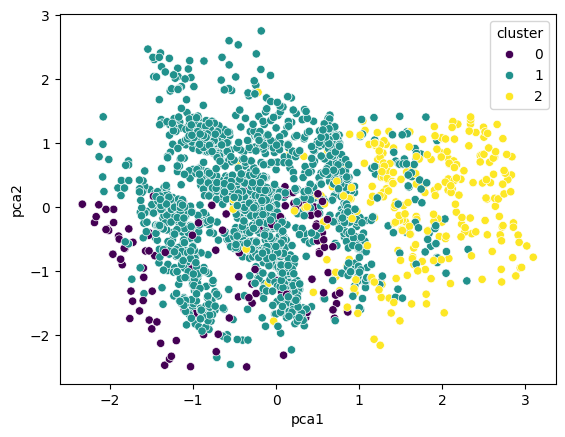

In [473]:
df_demo_camp = getGaussianMixture(df_demo_camp,num_clusters_camp)
gaussian_demo_camp = silhouette_score(df_demo_camp[['pca1','pca2']],df_demo_camp['cluster'])
getPlots(df_demo_camp)

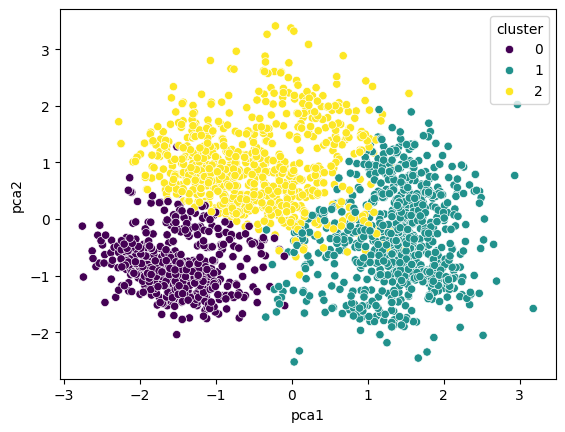

In [474]:
df_demo_purch = getGaussianMixture(df_demo_purch,num_clusters_purch)
gaussian_demo_purch = silhouette_score(df_demo_purch[['pca1','pca2']],df_demo_purch['cluster'])
getPlots(df_demo_purch)

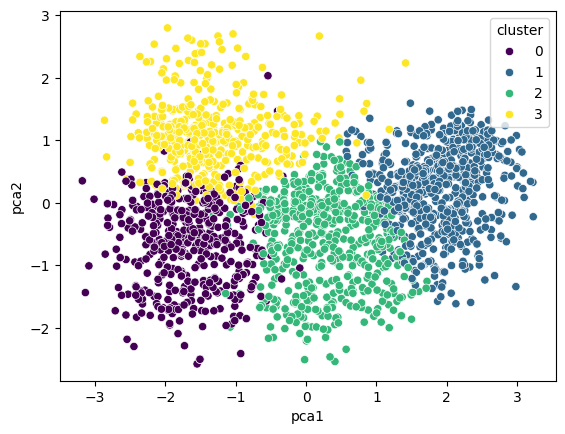

In [475]:
df_demo_spend = getGaussianMixture(df_demo_spend,num_clusters_spend)
gaussian_demo_spend = silhouette_score(df_demo_spend[['pca1','pca2']],df_demo_spend['cluster'])
getPlots(df_demo_spend)

* Now we have completed the clustering analysis on the feature clusters.
* We can move on to the evaluation of the clusters.

## 5. Evaluation of the Clusters

In [476]:
print(kmeans_demo_spend,agglo_demo_spend,gaussian_demo_spend)

0.3876029150887861 0.37651796492442235 0.3738334267705939


In [477]:
print(kmeans_demo_purch,agglo_demo_purch,gaussian_demo_purch)

0.47168966419482083 0.4353077505954902 0.434720730897648


In [478]:
print(kmeans_demo_camp,agglo_demo_camp,gaussian_demo_camp)

0.3449369361967416 0.2392132611633831 0.08062486057467902


* By checking the silhouette scores, we can see that the KMeans algorithm is the best algorithm for the clustering analysis for this data.
* However, overall the silhouette scores are not high which means the clusters are not well-separated like in Demographics-Campaign.
* Let's check the clusters and their characteristics.

## Demographics - Campaign Clusters

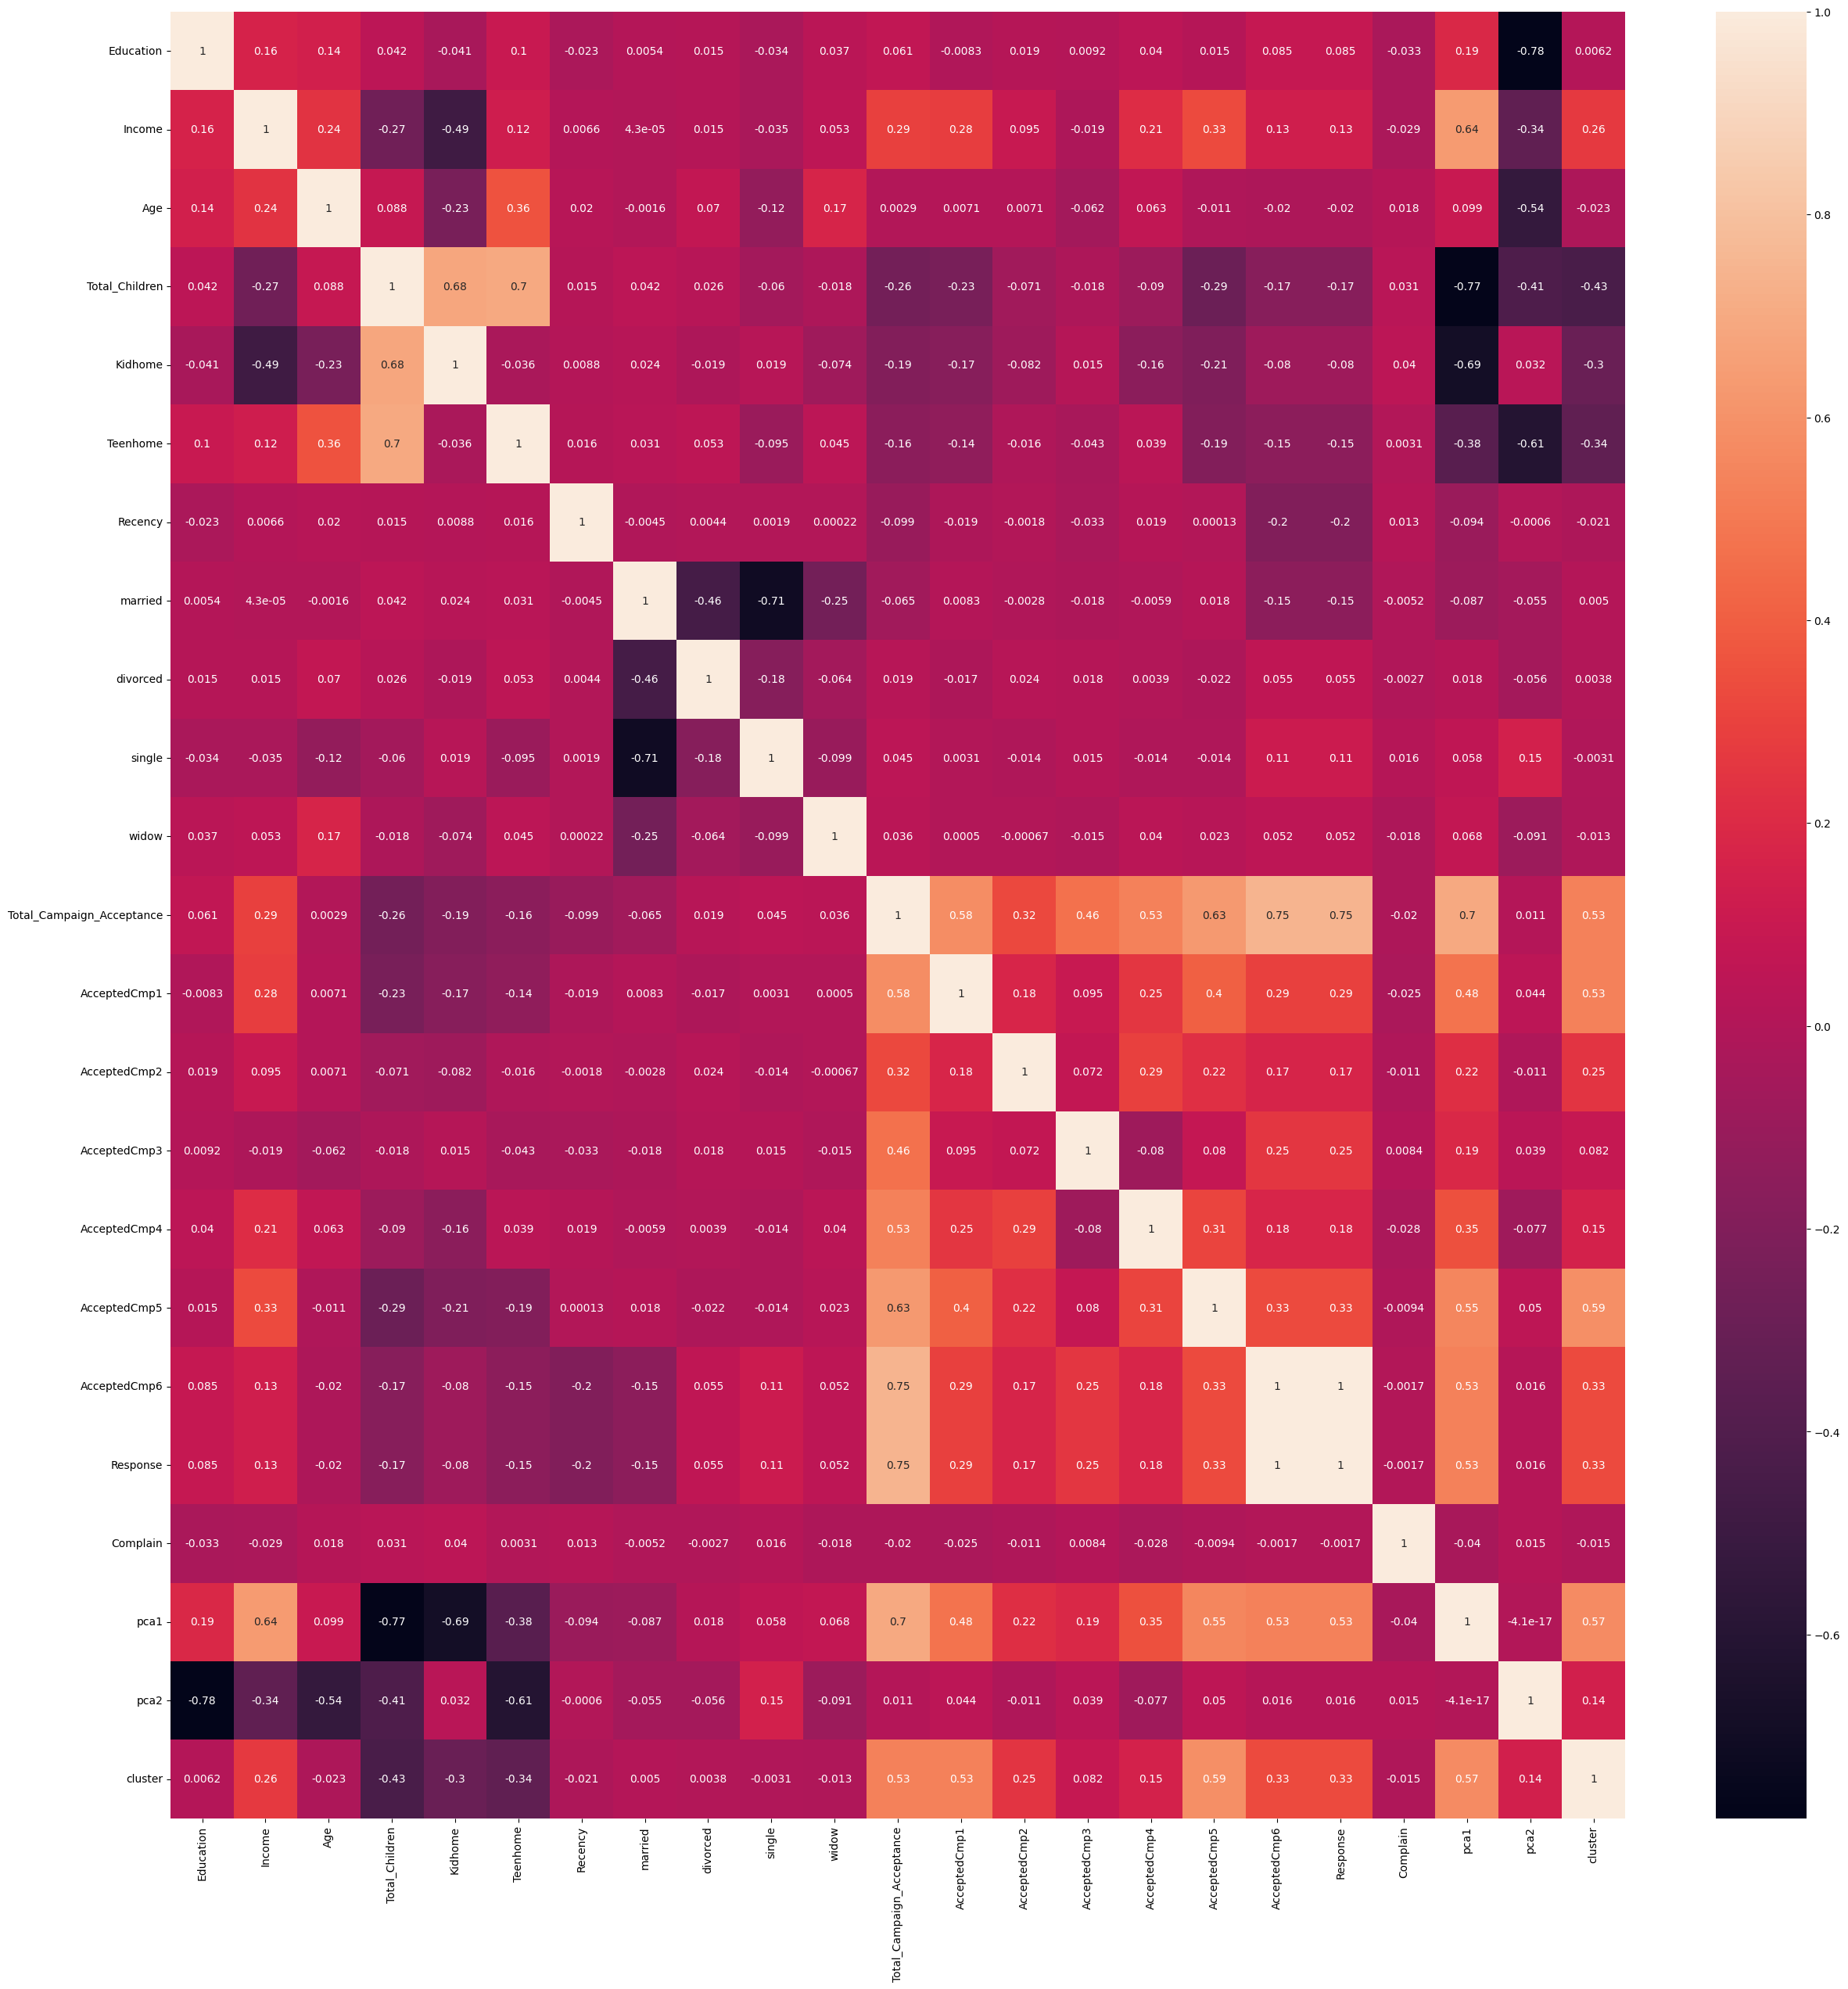

In [479]:
plt.figure(figsize=(30,30))
sns.heatmap(df_demo_camp.corr(),annot=True)
plt.show()

* We can say that for Campaign, features 'Education', 'Income','Kid Home' and 'Total Children' are the most important features for the clustering analysis.
* Let's check the clusters and their characteristics for the other clusters in terms of these features.

In [480]:
df_demo_camp[['Income','Total_Children','Kidhome','Teenhome','Age','AcceptedCmp1','AcceptedCmp4','AcceptedCmp5','Total_Campaign_Acceptance','cluster']].groupby('cluster').mean()

Income  Total_Children   Kidhome  Teenhome       Age  AcceptedCmp1  \
cluster                                                                         
0       -0.012736        0.727586  0.751724  1.158621  0.384674      0.020690   
1       -0.246431       -0.016694  0.481914  0.501391  0.020126      0.000000   
2        0.542092       -0.714765  0.067114  0.218121  0.170768      0.473154   

         AcceptedCmp4  AcceptedCmp5  Total_Campaign_Acceptance  
cluster                                                         
0            0.400000      0.006897                   0.456059  
1            0.000000      0.000000                   0.167119  
2            0.365772      0.543624                   1.599198

### Cluster 0
* Cluster 0 has the lowest incomed customer cluster.
* Customers in this cluster tend to accept the campaigns less than the any other clusters.
* They're the youngest cluster compared to the other clusters.
* Their child count is on the middle level compared to the other clusters.

### Cluster 1
* Cluster 1 has the middle incomed customer cluster.
* They tend to accept the campaigns more than Cluster 0 but less than Cluster 2.
* They're the oldest cluster compared to the other clusters.
* They have the highest number of children at home(teen and kid) and total compared to the other clusters.

### Cluster 2
* Cluster 2 has the highest incomed customer cluster.
* They tend to be accept the campaigns more than the other clusters.
* They're middle aged compared to other clusters.
* They have the lowest number of children at home(teen and kid) and total compared to the other clusters.

# Comments of Campaign Features

* Marketing needs to focus on customers in Cluster 0 and Cluster 1.
* They need to focus on the young and middle aged customers with middle income and high number of children at home.
* Marketing is already doing well for Cluster 2 but they can still focus on them more.
* Campaigns 1,4 and 5 aims on different types of customers. They can be used for different clusters.

## Demographics - Purchase Clusters

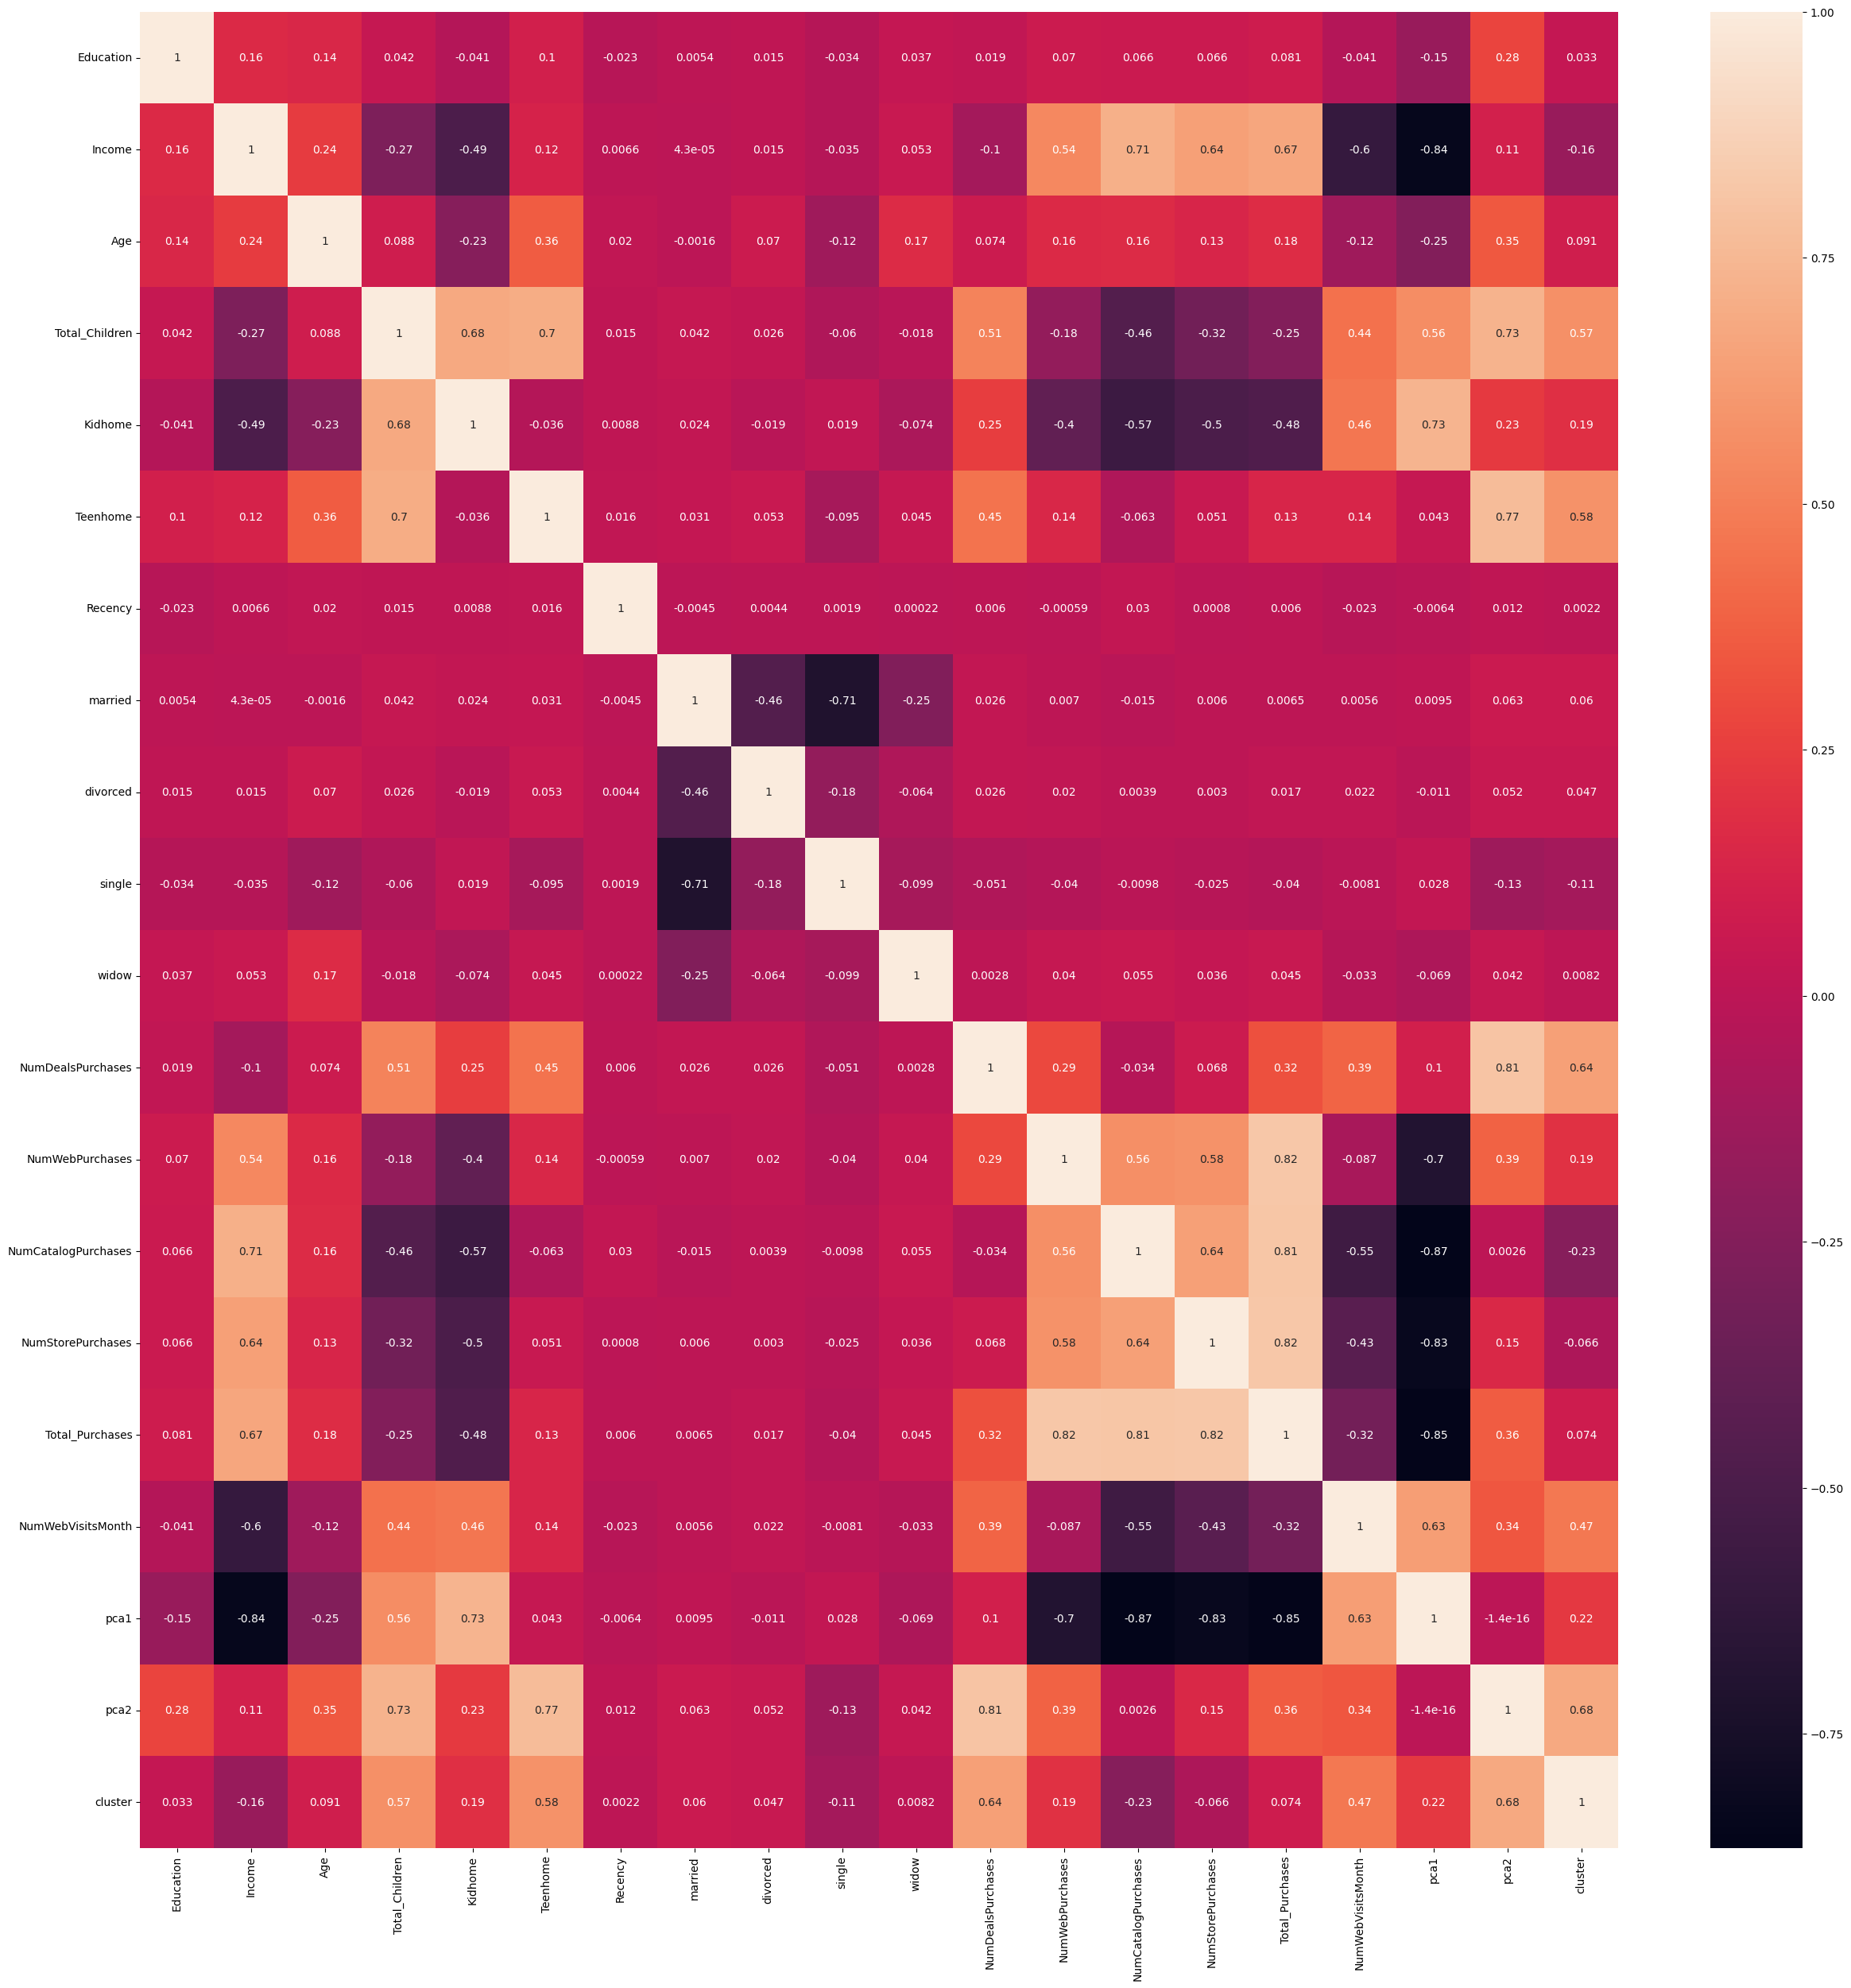

In [481]:
plt.figure(figsize=(30,30))
sns.heatmap(df_demo_purch.corr(),annot=True)
plt.show()

In [482]:
df_demo_purch[['Income','Kidhome','Teenhome','Age','NumWebVisitsMonth','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Total_Purchases','cluster']].groupby('cluster').mean()

Income   Kidhome  Teenhome       Age  NumWebVisitsMonth  \
cluster                                                              
0        0.543248  0.019298  0.084211  0.109649          -0.815351   
1       -0.772994  0.791855  0.432127 -0.111865           0.111991   
2        0.115184  0.361323  0.895674  0.228018          -0.034033   

         NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
cluster                                                            
0               0.148033             0.534807           0.661404   
1              -0.714185            -0.481127          -0.406787   
2               0.348476             0.121629           0.428244   

         Total_Purchases  
cluster                   
0               0.388596  
1              -0.611686  
2               0.375318

### Cluster 0
* Cluster 0 has the lowest incomed customer cluster.
* They tend to make the least amount of purchases compared to the other clusters.
* They tend to visit the website the highest amount of times compared to the other clusters.
* They have the highest number of kids compared to other clusters.
* They are the youngest cluster compared to the other clusters.

### Cluster 1
* Cluster 1 has the high incomed customer cluster.
* They tend to make the most amount of purchases compared to the other clusters.
* They tend to visit the website the least amount of times compared to the other clusters.
* They have the lowest number of kids compared to other clusters.
* They are middle aged compared to the other clusters.

### Cluster 2
* Cluster 2 has the middle incomed customer cluster.
* They tend to make as much purchases as Cluster 1 but these purchases are less.
* They tend to visit the website the middle amount of times compared to the other clusters.
* They have the middle number of kids compared to other clusters.
* They are the oldest cluster compared to the other clusters.


# Comments of the Purchase Features
* Marketing needs to focus on customers in Cluster 0 and Cluster 2.
* Cluster 2 is the most important cluster for the marketing since they are the middle incomed customers and they tend to make purchases as much as the high incomed customers.
* Marketing is already doing well for Cluster 1 but they can still focus on them more.
* Cluster 0 zero visits the website more than any other cluster but they are the lowest on the purchases. Marketing can focus on them to convert their visits to purchases by adding special ads or offers based on their demographic attributes.
* Cluster 1 is more likely to shop what they see, this is because they purchase from catalogs and stores more than web. Marketing can focus on them to increase their web purchases or reorder their shop plan to stand out the products visually.
* Cluster 2 uses both web and store purchases, marketing can focus on them to increase their catalog purchases. Also marketing can stand out specialized deals which will lead customers to use web and shops more. For example they can make a code which will be used only in web purchases and this code can only be used in shops or web. This will increase the visibility of ad for customers which use web and stores actively.

# Demographics - Spending Clusters

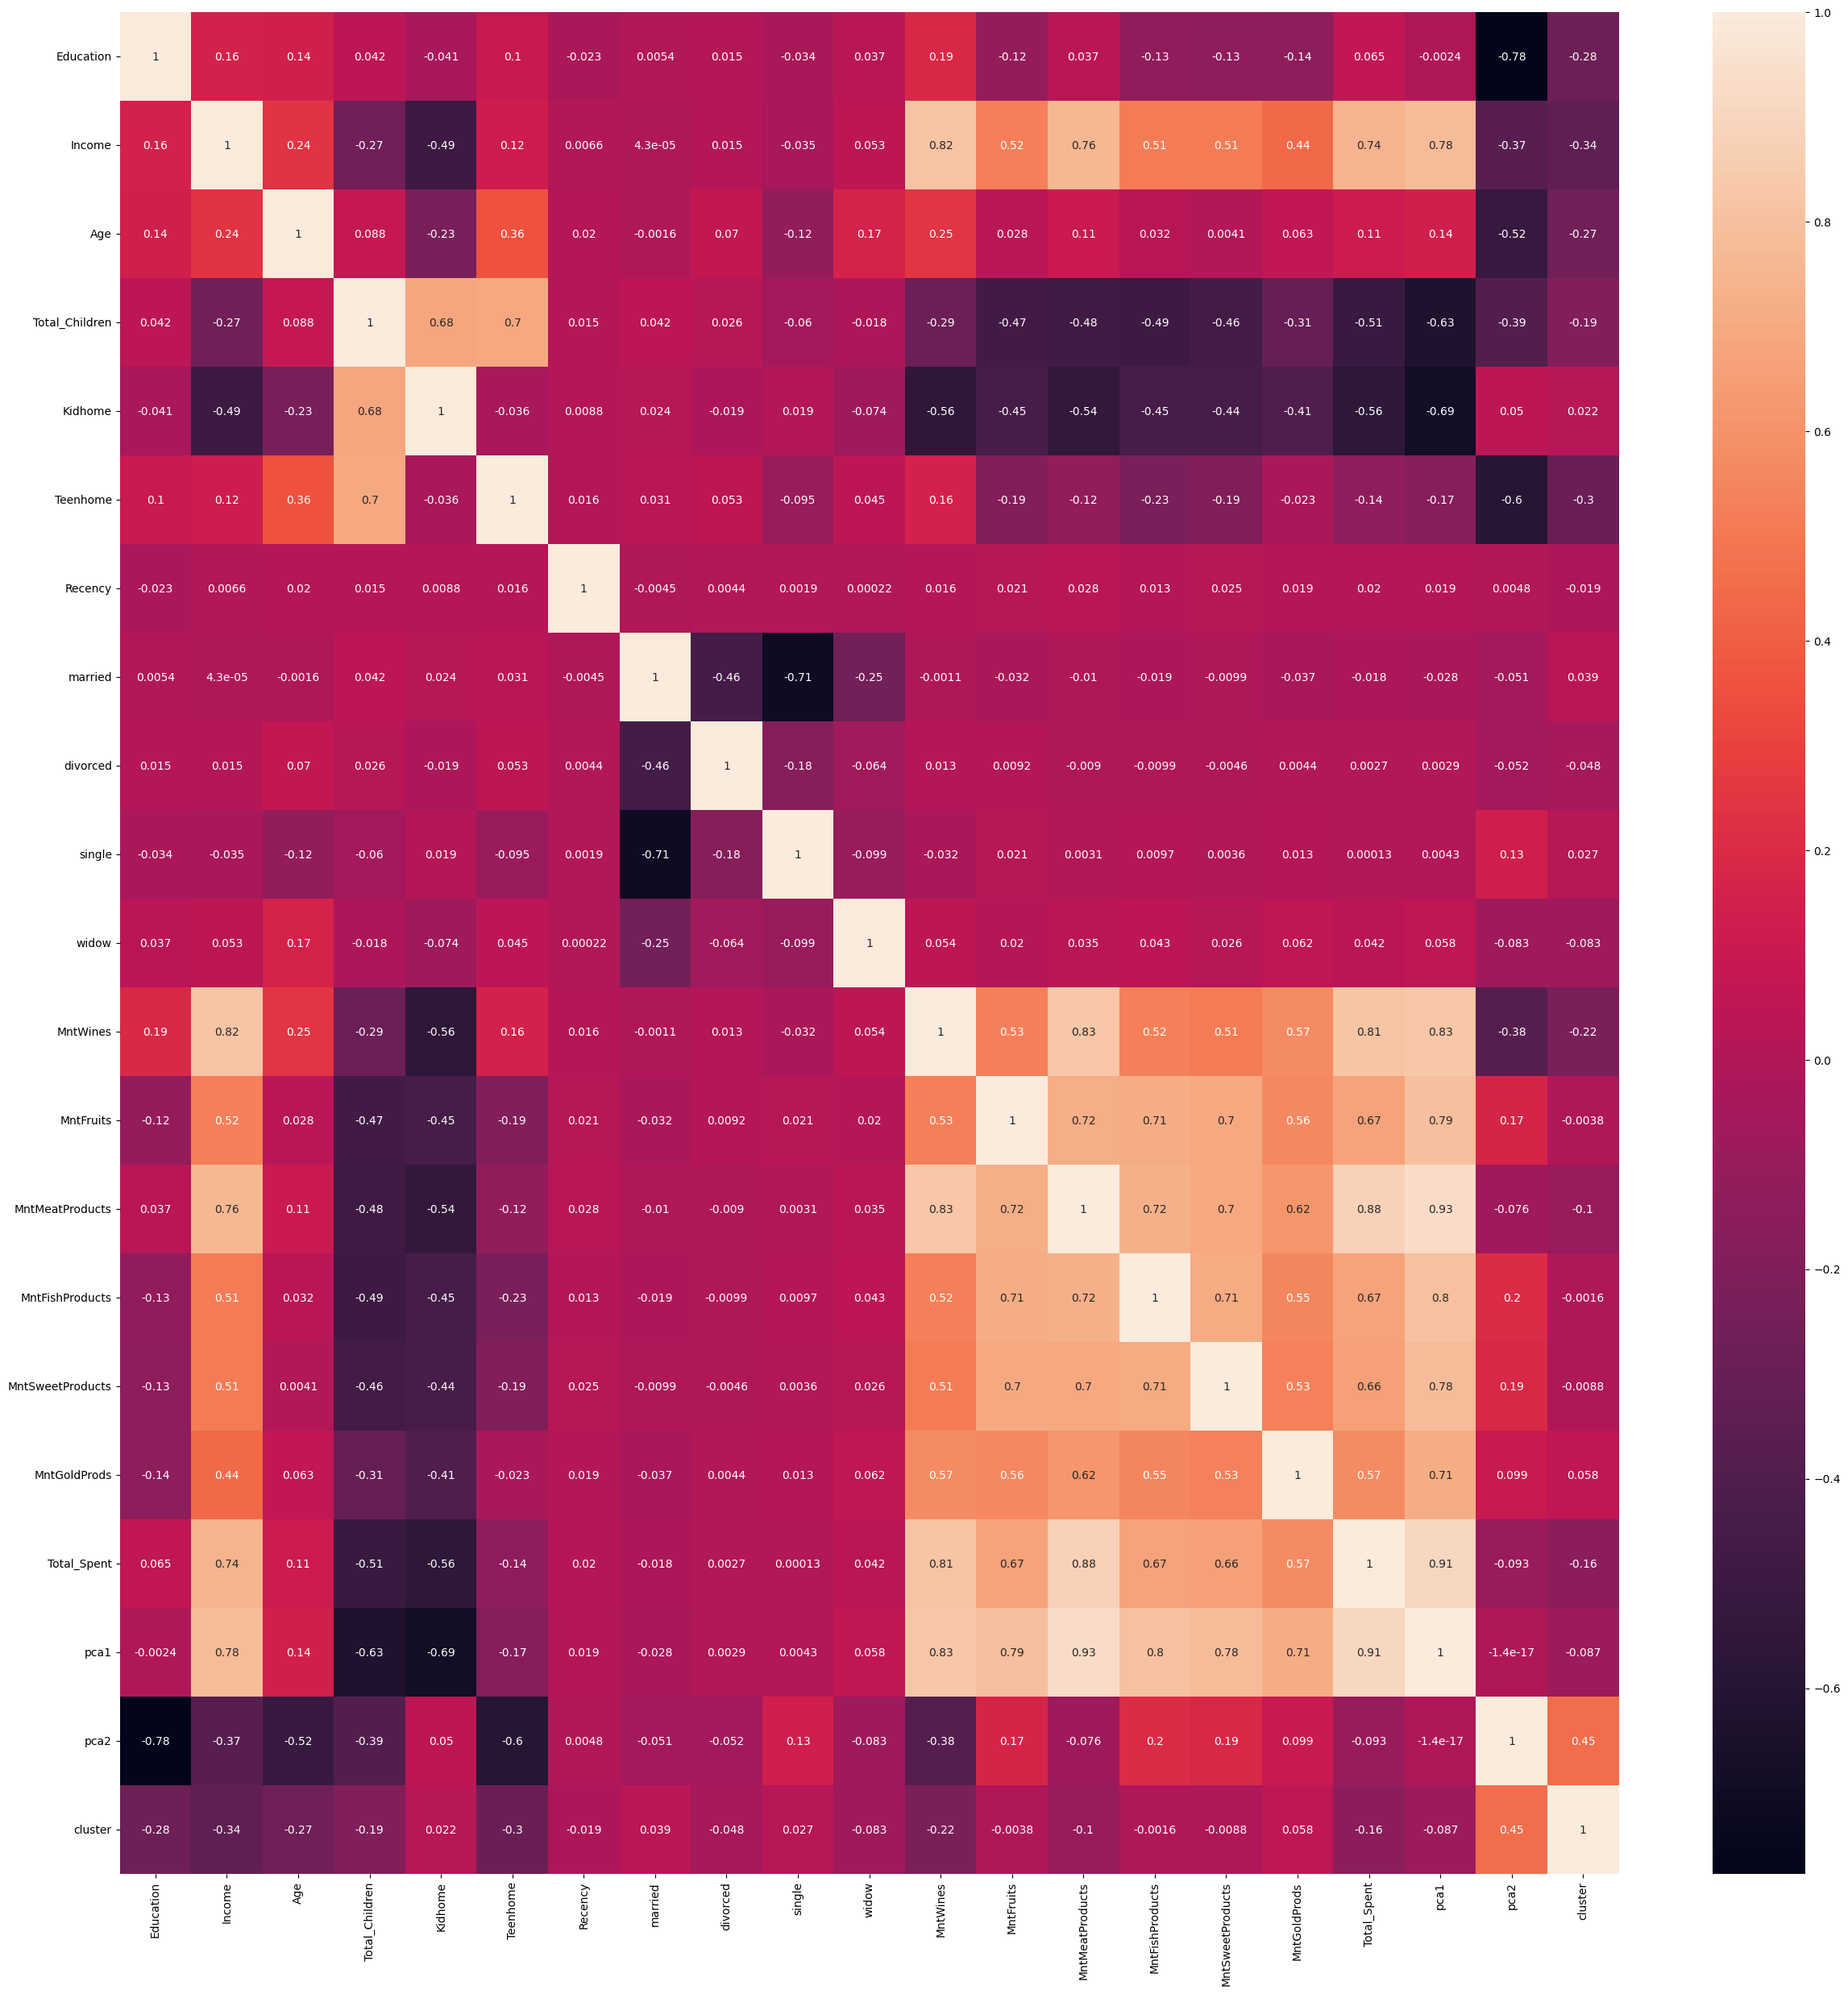

In [483]:
plt.figure(figsize=(30,30))
sns.heatmap(df_demo_spend.corr(),annot=True)
plt.show()

In [487]:
df_demo_spend[['Education','Age','Income','Total_Children','Kidhome','Teenhome','MntGoldProds','MntWines','MntSweetProducts','MntFishProducts','MntMeatProducts','MntFruits','Total_Spent','cluster']].groupby('cluster').mean()

Education       Age    Income  Total_Children   Kidhome  Teenhome  \
cluster                                                                      
0         1.043478  0.213826 -0.434762        0.678054  0.871636  0.853002   
1         0.580694  0.097620  0.514073       -0.723982  0.045249  0.230769   
2         0.868552  0.319560  0.143815        0.154742  0.247920  0.913478   
3         0.162272 -0.440613 -1.015037       -0.158215  0.801217  0.040568   

         MntGoldProds  MntWines  MntSweetProducts  MntFishProducts  \
cluster                                                              
0           -0.667854 -0.540177         -0.447384        -0.558121   
1            0.500798  0.348175          0.650465         0.709676   
2            0.184984  0.190206          0.030235        -0.007136   
3           -0.371770 -0.859257         -0.176223        -0.229833   

         MntMeatProducts  MntFruits  Total_Spent  
cluster                                           
0              -0.588844  -0.457668    -0.308135  
1               0.633675   0.647080     0.942649  
2               0.120585   0.041384     0.256818  
3              -0.534946  -0.183158    -0.303050

### Cluster 0
* Cluster 0 is the most educated cluster.
* They tend to spend the least amount of money compared to the other clusters.
* Their spending habit is balanced between the products.
* They have the highest number of kids compared to other clusters.
* They don't tend to buy gold products as much as other clusters.

### Cluster 1
* Cluster 1 is the highest incomed cluster.
* They tend to spend the most amount of money compared to the other clusters.
* They tend to spend the most amount of money on fish, meat and gold products.
* They have the lowest number of kids compared to other clusters.


### Cluster 2

* Cluster 2 is the oldest cluster.
* They tend to spend the middle amount of money compared to the other clusters.
* They tend to spend the most amount of money on wines and meat products.
* They have the middle number of kids compared to other clusters.

### Cluster 3

* Cluster 3 is the lowest incomed cluster.
* They tend to spend the minimum amount of money compared to the other clusters.
* They tend to spend the most amount of money on fruits and sweet products.
* They have the middle number of kids compared to other clusters.
* They are the lowest educated cluster.

# Comments of the Spending Features

* Marketing needs to focus on customers in Cluster 0 and Cluster 2.

* Cluster 2 is the oldest customer cluster and they tend to spend the middle amount of money. Marketing can focus on them to increase their spending by adding special ads or offers based on their demographic attributes. For example they can focus on marketing with old techniques. Instead of web pop up ads, they can use TV ads or they can use radio ads. They can also add more ads for wines and meat products since they tend to spend the most amount of money on these products.

* Marketing is already doing well for Cluster 1 but they can still focus on them more. Since they are the highest incomed cluster, marketing can focus on the products which are expensive and which are not bought by them as much as the other clusters. Their education level is lower than the other clusters so marketing can make ads which will make these customer feel special and unique.

* Cluster 0 is the most educated cluster and they tend to spend the least amount of money. Marketing can focus on them to increase their spending by adding special ads or offers based on their demographic attributes. Since their education level is high, they might be more open to the ads which are more detailed and informative. They have the most amount of kids so marketing can focus on natural and healthy products which have detailed ads for them. By this way, these customers will be more likely to buy products which they think it's good for their kids.

* Cluster 3 is the lowest educated cluster and they tend to spend the minimum amount of money. Marketing can focus on them to increase their spending by adding special ads or offers based on their demographic attributes. For example they can simplify the ads for them to understand better and to make them feel more comfortable. Also they can add more ads for fruits and sweet products since they tend to spend the most amount of money on these products.



# What was accomplished in this study?
* The marketing campaign data was thoroughly analyzed, and customers were grouped into clusters based on their behavior.
* Results were drawn from the clustering analysis to comprehend the distinct customer segments.
* Dimensionality reduction techniques like PCA were utilized to visualize clusters in either 2D or 3D space.
* Evaluation of the clusters was conducted, accompanied by pertinent comments.
* Recommendations for marketing strategies were formulated based on the cluster findings.
* The study concluded, yielding valuable insights from the clustering analysis of the marketing campaign data.

**Thank you for reading my notebook. I hope you find it useful and enjoyable.**
**Please feel free to give feedback and ask questions.**
**Mail: alperendemirci65@gmail.com**